# The Programme for International Student Assessment (PISA) Data Exploration
## by Shaheer Khan

## Preliminary Wrangling

> The dataset being analyzed is gathered from PISA, which is a survey depicting students' skills and knowledge as they approach the end of compulsory education. It is not a conventional school test. This test focuses on how well prepared are students for life beyond school. Unlike many conventional tests which evaluate how well students have learned the school curriculum. The PISA test evaluates the more practical and real life scenario of a student's journey through life after school.

> Around 510,000 students in 65 economies took part in the PISA 2012 assessment of reading, mathematics and science representing about 28 million 15-year-olds globally. Of those economies, 44 took part in an assessment of creative problem solving and 18 in an assessment of financial literacy.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
df_pisa = pd.read_csv('pisa2012.csv', encoding='latin-1')

### What is the structure of your dataset?

In [3]:
print(df_pisa.shape)
df_pisa.head()

(485490, 636)


Unnamed: 0      CNT  SUBNATIO  STRATUM      OECD       NC  SCHOOLID  \
0           1  Albania     80000  ALB0006  Non-OECD  Albania         1   
1           2  Albania     80000  ALB0006  Non-OECD  Albania         1   
2           3  Albania     80000  ALB0006  Non-OECD  Albania         1   
3           4  Albania     80000  ALB0006  Non-OECD  Albania         1   
4           5  Albania     80000  ALB0006  Non-OECD  Albania         1   

   STIDSTD  ST01Q01  ST02Q01  ...  W_FSTR75  W_FSTR76 W_FSTR77 W_FSTR78  \
0        1       10      1.0  ...   13.7954   13.9235  13.1249  13.1249   
1        2       10      1.0  ...   13.7954   13.9235  13.1249  13.1249   
2        3        9      1.0  ...   12.7307   12.7307  12.7307  12.7307   
3        4        9      1.0  ...   12.7307   12.7307  12.7307  12.7307   
4        5        9      1.0  ...   12.7307   12.7307  12.7307  12.7307   

   W_FSTR79 W_FSTR80 WVARSTRR VAR_UNIT SENWGT_STU  VER_STU  
0    4.3389  13.0829       19        1     0.2098  22NOV13  
1    4.3389  13.0829       19        1     0.2098  22NOV13  
2    4.2436  12.7307       19        1     0.1999  22NOV13  
3    4.2436  12.7307       19        1     0.1999  22NOV13  
4    4.2436  12.7307       19        1     0.1999  22NOV13  

[5 rows x 636 columns]

#### Checking for Duplicated in Student ID

In [4]:
df_pisa[df_pisa.duplicated(['STIDSTD'], keep=False)]

Unnamed: 0      CNT  SUBNATIO  STRATUM      OECD         NC  SCHOOLID  \
0                1  Albania     80000  ALB0006  Non-OECD    Albania         1   
1                2  Albania     80000  ALB0006  Non-OECD    Albania         1   
2                3  Albania     80000  ALB0006  Non-OECD    Albania         1   
3                4  Albania     80000  ALB0006  Non-OECD    Albania         1   
4                5  Albania     80000  ALB0006  Non-OECD    Albania         1   
...            ...      ...       ...      ...       ...        ...       ...   
485485      485486  Vietnam   7040000  VNM0317  Non-OECD  Viet Nam        162   
485486      485487  Vietnam   7040000  VNM0317  Non-OECD  Viet Nam        162   
485487      485488  Vietnam   7040000  VNM0317  Non-OECD  Viet Nam        162   
485488      485489  Vietnam   7040000  VNM0317  Non-OECD  Viet Nam        162   
485489      485490  Vietnam   7040000  VNM0317  Non-OECD  Viet Nam        162   

        STIDSTD  ST01Q01  ST02Q01  ...  W_FSTR75  W_FSTR76 W_FSTR77 W_FSTR78  \
0             1       10      1.0  ...   13.7954   13.9235  13.1249  13.1249   
1             2       10      1.0  ...   13.7954   13.9235  13.1249  13.1249   
2             3        9      1.0  ...   12.7307   12.7307  12.7307  12.7307   
3             4        9      1.0  ...   12.7307   12.7307  12.7307  12.7307   
4             5        9      1.0  ...   12.7307   12.7307  12.7307  12.7307   
...         ...      ...      ...  ...       ...       ...      ...      ...   
485485     4955       10      3.0  ...   31.2413   93.7238  93.7238  93.7238   
485486     4956       10      3.0  ...   33.9163   96.0036  96.0036  96.0036   
485487     4957       10      3.0  ...   33.9163   96.0036  96.0036  96.0036   
485488     4958       10      3.0  ...   33.9163   96.0036  96.0036  96.0036   
485489     4959       10      3.0  ...   31.2413   93.7238  93.7238  93.7238   

        W_FSTR79 W_FSTR80 WVARSTRR VAR_UNIT SENWGT_STU  VER_STU  
0         4.3389  13.0829       19        1     0.2098  22NOV13  
1         4.3389  13.0829       19        1     0.2098  22NOV13  
2         4.2436  12.7307       19        1     0.1999  22NOV13  
3         4.2436  12.7307       19        1     0.1999  22NOV13  
4         4.2436  12.7307       19        1     0.1999  22NOV13  
...          ...      ...      ...      ...        ...      ...  
485485   93.7238  31.2413       41        1     0.0653  22NOV13  
485486   96.0036  33.9163       41        1     0.0688  22NOV13  
485487   96.0036  33.9163       41        1     0.0688  22NOV13  
485488   96.0036  33.9163       41        1     0.0688  22NOV13  
485489   93.7238  31.2413       41        1     0.0653  22NOV13  

[482757 rows x 636 columns]

In [5]:
df_pisa['STIDSTD'].value_counts()

135      68
254      68
204      68
192      68
273      68
         ..
33318     1
33194     1
31289     1
33574     1
31100     1
Name: STIDSTD, Length: 33806, dtype: int64

In [6]:
df_pisa[df_pisa['STIDSTD'] == 135].head(10)

Unnamed: 0                   CNT  SUBNATIO  STRATUM      OECD  \
134           135               Albania     80000  ALB0005  Non-OECD   
4877         4878  United Arab Emirates   7840200  ARE0211  Non-OECD   
16377       16378             Argentina    320000  ARG0005  Non-OECD   
22285       22286             Australia    360000  AUS0103      OECD   
36766       36767               Austria    400000  AUT9797      OECD   
41521       41522               Belgium    560100  BEL0115      OECD   
50118       50119              Bulgaria   1000000  BGR0009  Non-OECD   
55400       55401                Brazil    760000  BRA1130  Non-OECD   
74604       74605                Canada   1240000  CAN1092      OECD   
96148       96149           Switzerland   7560000  CHE0022      OECD   

                          NC  SCHOOLID  STIDSTD  ST01Q01  ST02Q01  ...  \
134                  Albania         6      135       10      1.0  ...   
4877   United Arab Emirates          6      135       10      1.0  ...   
16377              Argentina         5      135        9      7.0  ...   
22285              Australia         8      135       10      1.0  ...   
36766                Austria         6      135        9     11.0  ...   
41521                Belgium         5      135       10      6.0  ...   
50118              Bulgaria          6      135        9      3.0  ...   
55400                Brazil          5      135       11      1.0  ...   
74604                Canada          6      135        9      1.0  ...   
96148            Switzerland         7      135       10     21.0  ...   

       W_FSTR75  W_FSTR76 W_FSTR77 W_FSTR78  W_FSTR79 W_FSTR80 WVARSTRR  \
134      4.6827   14.0482  14.0482   4.6827    4.6827   4.6827       24   
4877     1.1443    3.4328   1.1207   3.3621    1.1443   1.1207       79   
16377  134.7860  142.6394  51.7985  52.1211   52.1211  52.1211       50   
22285    0.6422    1.9598   1.9551   0.6874    0.6896   1.9210       73   
36766    8.1514   24.2837  25.0713   8.5346   24.2837  25.0713       13   
41521    8.1189   25.2656  24.9500   7.9070    7.9070   7.9929       36   
50118    4.7522    4.7522   4.7522   4.7522   14.2566  14.2566       61   
55400   61.7075   20.1958  20.1198  20.1651   20.1651  62.0353       49   
74604   14.6858   39.9397  43.7495  15.7342   38.9533  39.1271       57   
96148    8.3438   25.0314  25.0314  25.0314   25.0314   8.3438        6   

      VAR_UNIT SENWGT_STU  VER_STU  
134          2     0.2205  22NOV13  
4877         1     0.0558  22NOV13  
16377        1     0.1795  22NOV13  
22285        2     0.0054  22NOV13  
36766        2     0.2012  22NOV13  
41521        1     0.1401  22NOV13  
50118        2     0.1752  22NOV13  
55400        2     0.0173  22NOV13  
74604        2     0.0805  22NOV13  
96148        1     0.2085  22NOV13  

[10 rows x 636 columns]

In [7]:
pd.Series(df_pisa['STIDSTD']).is_unique

False

------------------------------------------------------------------------------

### Feature Engineering

#### Overall Literacy

> * PV1MATH to PV5MATH are for mathematical literacy; 
> * PV1SCIE to PV5SCIE for scientific literacy
> * PV1READ to PV5READ for reading literacy

Now I will create 3 variables each of which will be created from average of 5 plausible variables found in each of mathematical, scientific, reading literacy, as shown below. The following 3 variables that will be created are called:
> * 'Avg_Math_Literacy'
> * 'Avg_Scientific_Literacy'
> * 'Avg_Reading_Literacy'

In [8]:
df_pisa[['PV1MATH','PV2MATH','PV3MATH', 'PV4MATH', 'PV5MATH']].describe()

PV1MATH        PV2MATH        PV3MATH        PV4MATH  \
count  485490.000000  485490.000000  485490.000000  485490.000000   
mean      469.621653     469.648358     469.648930     469.641832   
std       103.265391     103.382077     103.407631     103.392286   
min        19.792800       6.473000      42.226200      24.622200   
25%       395.318600     395.318600     395.240700     395.396500   
50%       466.201900     466.124000     466.201900     466.279800   
75%       541.057800     541.447300     541.291500     541.447300   
max       962.229300     957.010400     935.745400     943.456900   

             PV5MATH  
count  485490.000000  
mean      469.695396  
std       103.419170  
min        37.085200  
25%       395.240700  
50%       466.435600  
75%       541.447300  
max       907.625800

In [9]:
df_pisa['Avg_Math_Literacy'] = df_pisa[['PV1MATH','PV2MATH','PV3MATH', 'PV4MATH', 'PV5MATH']].mean(axis=1)

In [10]:
df_pisa[['PV1SCIE','PV2SCIE','PV3SCIE','PV4SCIE','PV5SCIE']].describe()

PV1SCIE        PV2SCIE        PV3SCIE       PV4SCIE  \
count  485490.000000  485490.000000  485490.000000  485490.00000   
mean      475.769824     475.813674     475.851549     475.78524   
std       101.464426     101.514649     101.495072     101.51220   
min         2.648300       2.834800      11.879900       8.42970   
25%       404.457300     404.457300     404.550500     404.45730   
50%       475.699400     475.606100     475.699400     475.97910   
75%       547.780700     547.873900     547.967200     547.78070   
max       903.338300     900.540800     867.624000     926.55730   

             PV5SCIE  
count  485490.000000  
mean      475.820184  
std       101.566347  
min        17.754600  
25%       404.457300  
50%       475.885900  
75%       547.780700  
max       880.958600

In [11]:
df_pisa['Avg_Scientific_Literacy'] = df_pisa[['PV1SCIE','PV2SCIE','PV3SCIE','PV4SCIE','PV5SCIE']].mean(axis=1)

In [12]:
df_pisa[['PV1READ','PV2READ','PV3READ', 'PV4READ', 'PV5READ']].describe()

PV1READ        PV2READ        PV3READ        PV4READ  \
count  485490.000000  485490.000000  485490.000000  485490.000000   
mean      472.004640     472.068052     472.022059     471.926562   
std       102.505523     102.626198     102.640489     102.576066   
min         0.083400       0.703500       0.703500       4.134400   
25%       403.600700     403.360100     403.360100     403.354600   
50%       475.455000     475.535200     475.455000     475.535200   
75%       544.502500     544.503500     544.503500     544.502500   
max       904.802600     881.239200     884.447000     881.159000   

             PV5READ  
count  485490.000000  
mean      472.013506  
std       102.659989  
min         2.307400  
25%       403.360100  
50%       475.535200  
75%       544.503500  
max       901.608600

In [13]:
df_pisa['Avg_Reading_Literacy'] = df_pisa[['PV1READ','PV2READ','PV3READ', 'PV4READ', 'PV5READ']].mean(axis=1)

In [14]:
df_pisa[['Avg_Math_Literacy',
'Avg_Scientific_Literacy',
'Avg_Reading_Literacy']].head()

Avg_Math_Literacy  Avg_Scientific_Literacy  Avg_Reading_Literacy
0          366.18634                371.91348             261.01424
1          470.56396                478.12382             384.68832
2          505.53824                486.60946             405.18154
3          449.45476                453.97240             477.46376
4          385.50398                367.15778             256.01010

> Now I will create one last variable based on the 3 newly created variables. This variable will be called "Overall_Literacy" and this will be composed off the average of the 3 previously created variables. 

In [15]:
df_pisa['Overall_Literacy'] = df_pisa[['Avg_Math_Literacy',
'Avg_Scientific_Literacy',
'Avg_Reading_Literacy']].mean(axis=1)

In [16]:
df_pisa[['Avg_Math_Literacy',
'Avg_Scientific_Literacy',
'Avg_Reading_Literacy','Overall_Literacy']].head()

Avg_Math_Literacy  Avg_Scientific_Literacy  Avg_Reading_Literacy  \
0          366.18634                371.91348             261.01424   
1          470.56396                478.12382             384.68832   
2          505.53824                486.60946             405.18154   
3          449.45476                453.97240             477.46376   
4          385.50398                367.15778             256.01010   

   Overall_Literacy  
0        333.038020  
1        444.458700  
2        465.776413  
3        460.296973  
4        336.223953

#### Average Learning Time in mins (per Week)

> Another variable is to be created using the following three variables:
> * SMINS - Learning time (minutes per week) - Science
> * MMINS - Learning time (minutes per week) - Maths
> * LMINS - Learning time (minutes per week) - Language

> The variable will be called 'Average_Learning_Time' and it will be the average of the 3 variables mentioned above.

In [17]:
df_pisa[['SMINS', 'MMINS', 'LMINS']].describe()

SMINS          MMINS          LMINS
count  270914.000000  283303.000000  282866.000000
mean      211.122460     226.007056     219.276636
std       131.368322      97.448421      97.997730
min         0.000000       0.000000       0.000000
25%       120.000000     180.000000     165.000000
50%       180.000000     220.000000     200.000000
75%       270.000000     250.000000     250.000000
max      2975.000000    3000.000000    2400.000000

In [18]:
df_pisa['Average_Learning_Time'] = df_pisa[['SMINS', 'MMINS', 'LMINS']].mean(axis=1)
df_pisa[['SMINS', 'MMINS', 'LMINS', 'Average_Learning_Time']].sample(7)

SMINS  MMINS  LMINS  Average_Learning_Time
236643   90.0  225.0  180.0                  165.0
373006    NaN    NaN    NaN                    NaN
179314    NaN    NaN    NaN                    NaN
394496    NaN    NaN    NaN                    NaN
152419    0.0  180.0  180.0                  120.0
320653  200.0  200.0  200.0                  200.0
86933   300.0  300.0  300.0                  300.0

### What is/are the main feature(s) of interest in your dataset?

> * CNT - Country (Categorical)
> * OECD - Is OECD or not (Categorical)

> * PV1MATH to PV5MATH - mathematical literacy (Quantitative)
> * PV1SCIE to PV5SCIE - scientific literacy (Quantitative)
> * PV1READ to PV5READ - reading literacy (Quantitative)
> * 'Avg_Math_Literacy', 'Avg_Scientific_Literacy' and 'Avg_Reading_Literacy' - (Quantitative)
> * Overall_Literacy - *Engineered Variable* (Quantitative)

> * ST01Q01 - Student Grade out of 100 (Quantitative)
> * GRADE - Grade compared to modal grade in country (Quantitative). 
The relative grade index (GRADE) was computed to capture between-country variation. It indicates whether students are
in the country’s a modal grade i (value of 0) or whether they are below or above the modal grade (+x grades, -x grades).
The information about the students’ grade level was taken from the Student Questionnaire (ST001) whereas the modal
grade was defined by the country and documented in the student tracking form.
> * ST04Q01 - Gender (Categorical)
> * ST93Q01 - Perseverance: Give up easily (Categorical)
> * IC01Q01 to IC01Q07 - computer, internet, cellphone at home
> * IC08Q08 - Obtain practical information from the Internet (Categorical)
> * ST22Q01 - Acculturation: Mother Immigrant (Filter) (Categorical)
> * BFMJ2 - Father SQ ISEI: higher ISEI scores indicate higher levels of occupational status. (Quantitative)
> * BMMJ1 - Mother SQ ISEI: higher ISEI scores indicate higher levels of occupational status. (Quantitative)
> * HISCED - Highest educational level of parents (Categorical)
> * HISEI - Highest parental occupational status (Quantitative)
> * FISCED - Educational level of father (ISCED) (Categorical) 
> * PARED - Highest parental education in years (Quantitative)
> * REPEAT - Grade Repetition (class repeated) (Categorical)

> * SMINS - Learning time (minutes per week) - Science (Quantitative)
> * MMINS - Learning time (minutes per week) - Maths (Quantitative)
> * LMINS - Learning time (minutes per week) - Language (Quantitative)
> * Average_Learning_Time - *Engineered Variable* (Quantitative)

> * TIMEINT - Time of computer use (mins)

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> * CNT - Country (Categorical)
> * OECD - Is OECD or not (Categorical)
> * ST04Q01 - Gender (Categorical)
> * GRADE - Grade compared to modal grade in country (Quantitative).
> * Overall_Literacy - *Engineered Variable* (Quantitative)
> * Average_Learning_Time - *Engineered Variable* (Quantitative)
> * ST93Q01 - Perseverance: Give up easily (Categorical)
> * IC01Q01 to IC01Q07 - computer, internet, cellphone at home
> * ST22Q01 - Acculturation: Mother Immigrant (Filter) (Categorical)
> * HISCED - Highest educational level of parents (Categorical)
> * HISEI - Highest parental occupational status (Quantitative)
> * PARED - Highest parental education in years (Quantitative)
> * REPEAT - Grade Repetition (class repeated) (Categorical)
> * TIMEINT - Time of computer use (mins)

### Updated Dataframe

In [19]:
df_pisa = df_pisa[['CNT','OECD','ST04Q01','Overall_Literacy','GRADE','Average_Learning_Time','ST93Q01','IC01Q01','IC01Q02','IC01Q03','IC01Q04','IC01Q05','IC01Q06','IC01Q07','ST22Q01','HISCED','HISEI','PARED','REPEAT','TIMEINT']]
df_pisa.head()

CNT      OECD ST04Q01  Overall_Literacy  GRADE  Average_Learning_Time  \
0  Albania  Non-OECD  Female        333.038020    0.0                    NaN   
1  Albania  Non-OECD  Female        444.458700    0.0                  225.0   
2  Albania  Non-OECD  Female        465.776413   -1.0                  300.0   
3  Albania  Non-OECD  Female        460.296973   -1.0                  120.0   
4  Albania  Non-OECD  Female        336.223953   -1.0                    NaN   

              ST93Q01 IC01Q01 IC01Q02 IC01Q03 IC01Q04 IC01Q05 IC01Q06 IC01Q07  \
0   Very much like me     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
1  Not at all like me     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
2    Not much like me     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
3                 NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
4                 NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   

  ST22Q01             HISCED  HISEI  PARED                    REPEAT  TIMEINT  
0     NaN  ISCED 3A, ISCED 4    NaN   12.0  Did not repeat a <grade>      NaN  
1     NaN        ISCED 5A, 6    NaN   16.0  Did not repeat a <grade>      NaN  
2     NaN        ISCED 5A, 6    NaN   16.0  Did not repeat a <grade>      NaN  
3     NaN        ISCED 5A, 6    NaN   16.0  Did not repeat a <grade>      NaN  
4     NaN  ISCED 3A, ISCED 4    NaN   12.0  Did not repeat a <grade>      NaN

In [20]:
df_pisa.rename(columns = {'CNT':'Country',
                          'GRADE' : 'Grade',
                          'ST04Q01' : 'Gender',
                          'ST93Q01' : 'Perseverance_Give_up_easily',
                          'IC01Q01' : 'Desktop_at_Home',
                          'IC01Q02' : 'Portable_Laptop_at_Home',
                          'IC01Q03' : 'Tablet_Computer_at_Home',  
                          'IC01Q04' : 'Internet_Connection',   
                          'IC01Q05' : 'Video_Games_Console',  
                          'IC01Q06' : 'at_Home_Cell_phone_w/o_Internet',
                          'IC01Q07' : 'at_Home_Cell_phone_with_Internet',
                          'ST22Q01' : 'Mother_Immigrant',
                          'HISCED'  : 'Highest_educational_level_parents',
                          'HISEI'   : 'Highest_parental_occupational_status',
                          'PARED'   : 'Highest_parental_education_years',
                          'REPEAT'  : 'Class_repeated', 
                          'TIMEINT' : 'Computer_use_mins'}, inplace = True)
df_pisa.head()

Country      OECD  Gender  Overall_Literacy  Grade  Average_Learning_Time  \
0  Albania  Non-OECD  Female        333.038020    0.0                    NaN   
1  Albania  Non-OECD  Female        444.458700    0.0                  225.0   
2  Albania  Non-OECD  Female        465.776413   -1.0                  300.0   
3  Albania  Non-OECD  Female        460.296973   -1.0                  120.0   
4  Albania  Non-OECD  Female        336.223953   -1.0                    NaN   

  Perseverance_Give_up_easily Desktop_at_Home Portable_Laptop_at_Home  \
0           Very much like me             NaN                     NaN   
1          Not at all like me             NaN                     NaN   
2            Not much like me             NaN                     NaN   
3                         NaN             NaN                     NaN   
4                         NaN             NaN                     NaN   

  Tablet_Computer_at_Home Internet_Connection Video_Games_Console  \
0                     NaN                 NaN                 NaN   
1                     NaN                 NaN                 NaN   
2                     NaN                 NaN                 NaN   
3                     NaN                 NaN                 NaN   
4                     NaN                 NaN                 NaN   

  at_Home_Cell_phone_w/o_Internet at_Home_Cell_phone_with_Internet  \
0                             NaN                              NaN   
1                             NaN                              NaN   
2                             NaN                              NaN   
3                             NaN                              NaN   
4                             NaN                              NaN   

  Mother_Immigrant Highest_educational_level_parents  \
0              NaN                 ISCED 3A, ISCED 4   
1              NaN                       ISCED 5A, 6   
2              NaN                       ISCED 5A, 6   
3              NaN                       ISCED 5A, 6   
4              NaN                 ISCED 3A, ISCED 4   

   Highest_parental_occupational_status  Highest_parental_education_years  \
0                                   NaN                              12.0   
1                                   NaN                              16.0   
2                                   NaN                              16.0   
3                                   NaN                              16.0   
4                                   NaN                              12.0   

             Class_repeated  Computer_use_mins  
0  Did not repeat a <grade>                NaN  
1  Did not repeat a <grade>                NaN  
2  Did not repeat a <grade>                NaN  
3  Did not repeat a <grade>                NaN  
4  Did not repeat a <grade>                NaN

In [21]:
df_pisa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 485490 entries, 0 to 485489
Data columns (total 20 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Country                               485490 non-null  object 
 1   OECD                                  485490 non-null  object 
 2   Gender                                485490 non-null  object 
 3   Overall_Literacy                      485490 non-null  float64
 4   Grade                                 484617 non-null  float64
 5   Average_Learning_Time                 291055 non-null  float64
 6   Perseverance_Give_up_easily           312856 non-null  object 
 7   Desktop_at_Home                       296977 non-null  object 
 8   Portable_Laptop_at_Home               297068 non-null  object 
 9   Tablet_Computer_at_Home               295602 non-null  object 
 10  Internet_Connection                   297305 non-null  object 
 11  

### Data Wrangling

> Any column which has the missing data value to be of more than 60-70% of the dataset will be removed. Hence, The column called 'Mother_Immigrant' is removed. 

In [22]:
df_pisa.isnull().sum().sort_values(ascending=False)/485490*100

Mother_Immigrant                        91.612392
Average_Learning_Time                   40.049229
at_Home_Cell_phone_w/o_Internet         39.283404
Tablet_Computer_at_Home                 39.112649
at_Home_Cell_phone_with_Internet        39.006777
Video_Games_Console                     38.909761
Desktop_at_Home                         38.829430
Portable_Laptop_at_Home                 38.810686
Computer_use_mins                       38.809450
Internet_Connection                     38.761869
Perseverance_Give_up_easily             35.558714
Highest_parental_occupational_status     7.182228
Class_repeated                           5.020289
Highest_educational_level_parents        2.553915
Highest_parental_education_years         2.553915
Grade                                    0.179818
Overall_Literacy                         0.000000
Gender                                   0.000000
OECD                                     0.000000
Country                                  0.000000


In [23]:
df_pisa.isnull().sum().sort_values(ascending=False)

Mother_Immigrant                        444769
Average_Learning_Time                   194435
at_Home_Cell_phone_w/o_Internet         190717
Tablet_Computer_at_Home                 189888
at_Home_Cell_phone_with_Internet        189374
Video_Games_Console                     188903
Desktop_at_Home                         188513
Portable_Laptop_at_Home                 188422
Computer_use_mins                       188416
Internet_Connection                     188185
Perseverance_Give_up_easily             172634
Highest_parental_occupational_status     34869
Class_repeated                           24373
Highest_educational_level_parents        12399
Highest_parental_education_years         12399
Grade                                      873
Overall_Literacy                             0
Gender                                       0
OECD                                         0
Country                                      0
dtype: int64

**Dropping Mother_Immigrant Column due to excessive missing values**

In [24]:
df_pisa = df_pisa.drop(['Mother_Immigrant'], axis = 1)
df_pisa.columns

Index(['Country', 'OECD', 'Gender', 'Overall_Literacy', 'Grade',
       'Average_Learning_Time', 'Perseverance_Give_up_easily',
       'Desktop_at_Home', 'Portable_Laptop_at_Home', 'Tablet_Computer_at_Home',
       'Internet_Connection', 'Video_Games_Console',
       'at_Home_Cell_phone_w/o_Internet', 'at_Home_Cell_phone_with_Internet',
       'Highest_educational_level_parents',
       'Highest_parental_occupational_status',
       'Highest_parental_education_years', 'Class_repeated',
       'Computer_use_mins'],
      dtype='object')

#### Dropping Missing Values

In [25]:
df_pisa_final = df_pisa.dropna()
df_pisa_final.shape

(81985, 19)

In [26]:
print('The cleaned dataframe is composed of only',(81985)/485490*100,'% of the original dataset.') 

The cleaned dataframe is composed of only 16.887062555356444 % of the original dataset.


#### Fixing Formatting Errors
> * Error 1: Removing '<>' from the 'Class_repearted' column data.

> * Error 2: Removing unreadable syntax from the columns which have 'Yes, but I dont use it' replacing it with 'Yes, but I don't use it'

##### Error 1 Fixed

In [27]:
df_pisa_final.Class_repeated.value_counts()

Did not repeat a <grade>    72282
Repeated a <grade>           9703
Name: Class_repeated, dtype: int64

In [28]:
df_pisa_final['Class_repeated'] = df_pisa_final['Class_repeated'].str.replace("<","")
df_pisa_final['Class_repeated'] = df_pisa_final.Class_repeated.str.strip('>')
df_pisa_final.Class_repeated.value_counts()

Did not repeat a grade    72282
Repeated a grade           9703
Name: Class_repeated, dtype: int64

##### Error 2 Fixed

In [29]:
df_pisa_final.Desktop_at_Home.value_counts(dropna=False)

Yes, and I use it          56935
No                         15121
Yes, but I dont use it     9929
Name: Desktop_at_Home, dtype: int64

In [30]:
df_pisa_final["Desktop_at_Home"].replace({"Yes, but I dont use it": "Yes, but I don't use it"}, inplace=True)
df_pisa_final.Desktop_at_Home.value_counts(dropna=False)

Yes, and I use it          56935
No                         15121
Yes, but I don't use it     9929
Name: Desktop_at_Home, dtype: int64

In [31]:
df_pisa_final["Portable_Laptop_at_Home"].replace({"Yes, but I dont use it": "Yes, but I don't use it"}, inplace=True)
df_pisa_final["Tablet_Computer_at_Home"].replace({"Yes, but I dont use it": "Yes, but I don't use it"}, inplace=True)
df_pisa_final["Internet_Connection"].replace({"Yes, but I dont use it": "Yes, but I don't use it"}, inplace=True)
df_pisa_final["Video_Games_Console"].replace({"Yes, but I dont use it": "Yes, but I don't use it"}, inplace=True)
df_pisa_final["at_Home_Cell_phone_w/o_Internet"].replace({"Yes, but I dont use it": "Yes, but I don't use it"}, inplace=True)
df_pisa_final["at_Home_Cell_phone_with_Internet"].replace({"Yes, but I dont use it": "Yes, but I don't use it"}, inplace=True)
df_pisa_final["Highest_educational_level_parents"].replace({"Yes, but I dont use it": "Yes, but I don't use it"}, inplace=True)
df_pisa_final["Class_repeated"].replace({"Yes, but I dont use it": "Yes, but I don't use it"}, inplace=True)

#### Fixing Datatypes

In [32]:
df_pisa_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 81985 entries, 22153 to 475550
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Country                               81985 non-null  object 
 1   OECD                                  81985 non-null  object 
 2   Gender                                81985 non-null  object 
 3   Overall_Literacy                      81985 non-null  float64
 4   Grade                                 81985 non-null  float64
 5   Average_Learning_Time                 81985 non-null  float64
 6   Perseverance_Give_up_easily           81985 non-null  object 
 7   Desktop_at_Home                       81985 non-null  object 
 8   Portable_Laptop_at_Home               81985 non-null  object 
 9   Tablet_Computer_at_Home               81985 non-null  object 
 10  Internet_Connection                   81985 non-null  object 
 11  Video_Game

In [33]:
df_pisa_final['OECD'] = df_pisa_final.OECD.astype('category')
df_pisa_final['OECD'].dtypes

CategoricalDtype(categories=['Non-OECD', 'OECD'], ordered=False)

In [34]:
df_pisa_final['Gender'] = df_pisa_final.Gender.astype('category')
df_pisa_final['Perseverance_Give_up_easily'] = df_pisa_final.Perseverance_Give_up_easily.astype('category')
df_pisa_final['Desktop_at_Home'] = df_pisa_final.Desktop_at_Home.astype('category')
df_pisa_final['Portable_Laptop_at_Home'] = df_pisa_final.Portable_Laptop_at_Home.astype('category')
df_pisa_final['Tablet_Computer_at_Home'] = df_pisa_final.Tablet_Computer_at_Home.astype('category')
df_pisa_final['Internet_Connection'] = df_pisa_final.Internet_Connection.astype('category')
df_pisa_final['Video_Games_Console'] = df_pisa_final.Video_Games_Console.astype('category')
df_pisa_final['at_Home_Cell_phone_w/o_Internet'] = df_pisa_final['at_Home_Cell_phone_w/o_Internet'].astype('category')
df_pisa_final['at_Home_Cell_phone_with_Internet'] = df_pisa_final.at_Home_Cell_phone_with_Internet.astype('category')
df_pisa_final['Highest_educational_level_parents'] = df_pisa_final.Highest_educational_level_parents.astype('category')
df_pisa_final['Class_repeated'] = df_pisa_final.Class_repeated.astype('category')

In [35]:
df_pisa_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 81985 entries, 22153 to 475550
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype   
---  ------                                --------------  -----   
 0   Country                               81985 non-null  object  
 1   OECD                                  81985 non-null  category
 2   Gender                                81985 non-null  category
 3   Overall_Literacy                      81985 non-null  float64 
 4   Grade                                 81985 non-null  float64 
 5   Average_Learning_Time                 81985 non-null  float64 
 6   Perseverance_Give_up_easily           81985 non-null  category
 7   Desktop_at_Home                       81985 non-null  category
 8   Portable_Laptop_at_Home               81985 non-null  category
 9   Tablet_Computer_at_Home               81985 non-null  category
 10  Internet_Connection                   81985 non-null  category
 1

#### Column Content Evaluation

In [36]:
df_pisa_final.Country.value_counts(dropna=False, ascending=False)

Mexico                      9161
Italy                       8474
Spain                       7376
Australia                   4004
Switzerland                 3236
Finland                     2511
Belgium                     2159
Denmark                     1874
Chinese Taipei              1844
Singapore                   1762
Slovenia                    1678
Macao-China                 1643
Chile                       1641
China-Shanghai              1624
Czech Republic              1589
Korea                       1564
Russian Federation          1512
Croatia                     1493
Portugal                    1490
Ireland                     1459
Estonia                     1452
Poland                      1422
Hungary                     1384
Jordan                      1372
Slovak Republic             1336
Hong Kong-China             1322
Austria                     1303
Serbia                      1286
Sweden                      1279
Netherlands                 1257
Latvia    

In [37]:
df_pisa_final.OECD.value_counts(dropna=False)

OECD        63961
Non-OECD    18024
Name: OECD, dtype: int64

In [38]:
print(df_pisa_final.Grade.describe())
print('\n')
print(df_pisa_final.Grade.value_counts(dropna=False))

count    81985.000000
mean        -0.130024
std          0.576250
min         -3.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          2.000000
Name: Grade, dtype: float64


 0.0    61483
-1.0    12405
 1.0     5796
-2.0     1862
-3.0      241
 2.0      198
Name: Grade, dtype: int64


In [39]:
print(df_pisa_final.Overall_Literacy.describe())
print('\n')
print(df_pisa_final.Overall_Literacy.value_counts(dropna=False))

count    81985.000000
mean       501.342492
std         87.244693
min        150.580400
25%        438.459080
50%        501.317380
75%        563.954547
max        826.592027
Name: Overall_Literacy, dtype: float64


498.920340    2
523.033280    2
449.638400    2
590.149787    2
533.727793    2
             ..
623.971340    1
578.800233    1
621.342860    1
386.760507    1
562.977827    1
Name: Overall_Literacy, Length: 81935, dtype: int64


In [40]:
df_pisa_final.Perseverance_Give_up_easily.value_counts(dropna=False)

Not much like me      31085
Somewhat like me      21091
Not at all like me    18609
Mostly like me         7312
Very much like me      3888
Name: Perseverance_Give_up_easily, dtype: int64

In [41]:
df_pisa_final.Desktop_at_Home.value_counts(dropna=False)

Yes, and I use it          56935
No                         15121
Yes, but I don't use it     9929
Name: Desktop_at_Home, dtype: int64

In [42]:
df_pisa_final.Portable_Laptop_at_Home.value_counts(dropna=False)

Yes, and I use it          54967
No                         19788
Yes, but I don't use it     7230
Name: Portable_Laptop_at_Home, dtype: int64

In [43]:
df_pisa_final.Tablet_Computer_at_Home.value_counts(dropna=False)

No                         57199
Yes, and I use it          18699
Yes, but I don't use it     6087
Name: Tablet_Computer_at_Home, dtype: int64

In [44]:
df_pisa_final.Internet_Connection.value_counts(dropna=False)

Yes, and I use it          72982
No                          7560
Yes, but I don't use it     1443
Name: Internet_Connection, dtype: int64

In [45]:
df_pisa_final.Video_Games_Console.value_counts(dropna=False)

Yes, and I use it          41454
No                         27430
Yes, but I don't use it    13101
Name: Video_Games_Console, dtype: int64

In [46]:
df_pisa_final['at_Home_Cell_phone_w/o_Internet'].value_counts(dropna=False)

Yes, and I use it          46088
No                         20766
Yes, but I don't use it    15131
Name: at_Home_Cell_phone_w/o_Internet, dtype: int64

In [47]:
df_pisa_final.at_Home_Cell_phone_with_Internet.value_counts(dropna=False)

Yes, and I use it          56363
No                         17484
Yes, but I don't use it     8138
Name: at_Home_Cell_phone_with_Internet, dtype: int64

In [48]:
df_pisa_final.Highest_educational_level_parents.value_counts(dropna=False)

ISCED 5A, 6          27508
ISCED 3A, ISCED 4    20903
ISCED 5B             13575
ISCED 2               9624
ISCED 3B, C           6420
ISCED 1               3136
None                   819
Name: Highest_educational_level_parents, dtype: int64

In [49]:
print(df_pisa_final.Highest_parental_occupational_status.describe())
print('\n')
print(df_pisa_final.Highest_parental_occupational_status.value_counts(dropna=False))

count    81985.000000
mean        49.669058
std         21.608739
min         11.010000
25%         29.470000
50%         50.370000
75%         70.340000
max         88.960000
Name: Highest_parental_occupational_status, dtype: float64


82.41    1830
76.49    1756
28.48    1633
43.33    1474
76.65    1388
         ... 
75.67       3
16.89       3
18.29       1
11.87       1
29.30       1
Name: Highest_parental_occupational_status, Length: 419, dtype: int64


In [50]:
df_pisa_final.Highest_parental_education_years.value_counts(dropna=False)

12.0    15415
16.0    11637
13.0     7480
15.0     7285
17.0     6301
9.0      5322
16.5     4836
11.0     4015
14.0     3936
8.0      3385
6.0      2412
14.5     2063
18.0     1716
12.5     1247
10.0     1186
17.5      963
13.5      904
3.0       819
5.0       694
10.5      234
11.5      105
4.0        13
7.0        10
5.5         7
Name: Highest_parental_education_years, dtype: int64

In [51]:
df_pisa_final.Class_repeated.value_counts(dropna=False)

Did not repeat a grade    72282
Repeated a grade           9703
Name: Class_repeated, dtype: int64

In [52]:
print(df_pisa_final[['Average_Learning_Time']].describe())
print('\n')
print(df_pisa_final.Average_Learning_Time.value_counts(dropna=False))

       Average_Learning_Time
count           81985.000000
mean              215.113797
std                81.427004
min                 0.000000
25%               173.333333
50%               201.666667
75%               240.000000
max              2400.000000


200.000000    5778
180.000000    5559
240.000000    5298
210.000000    3938
150.000000    3649
              ... 
201.000000       1
422.500000       1
793.333333       1
95.333333        1
575.000000       1
Name: Average_Learning_Time, Length: 817, dtype: int64


In [53]:
print(df_pisa_final.Computer_use_mins.describe())
print('\n')
print(df_pisa_final.Computer_use_mins.value_counts(dropna=False))

count    81985.000000
mean        51.884564
std         40.296722
min          0.000000
25%         21.000000
50%         41.000000
75%         71.000000
max        206.000000
Name: Computer_use_mins, dtype: float64


39.0     5851
26.0     4983
51.0     4207
41.0     3615
19.0     3610
69.0     3300
28.0     3206
15.0     2945
32.0     2671
71.0     2566
13.0     2385
21.0     2361
54.0     2296
45.0     2251
9.0      2107
4.0      2012
111.0    1948
58.0     1935
6.0      1894
137.0    1826
94.0     1534
75.0     1500
0.0      1415
2.0      1356
81.0     1345
64.0     1270
11.0     1264
114.0    1212
139.0    1055
86.0     1029
88.0      923
56.0      871
118.0     738
17.0      693
34.0      659
144.0     595
96.0      581
206.0     554
77.0      524
124.0     513
150.0     505
92.0      478
99.0      441
163.0     334
101.0     315
62.0      299
180.0     294
30.0      268
107.0     255
43.0      236
154.0     219
49.0      173
129.0     150
84.0      141
120.0     138
47.0       7

## Univariate Exploration

> In this section, I will be investigating distributions of individual variables. I will also be monitoring any unusual points or outliers, and will further investigate to clean things up. The cleaning process will help to look at relationships between variables.

### Country Countplot

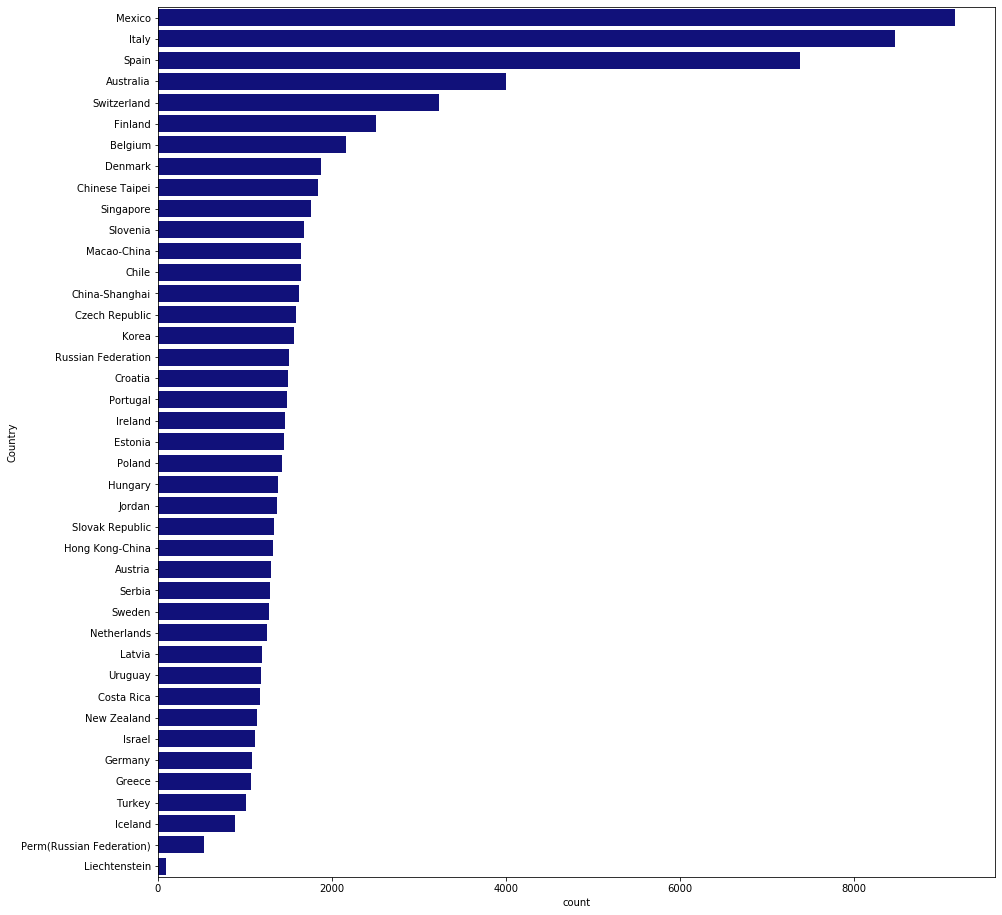

In [54]:
plt.figure(figsize=(15,16))
sb.countplot(data=df_pisa_final, y= 'Country', color='darkblue', order = df_pisa_final['Country'].value_counts(ascending=False).index);

> The variable investigated above is students' country of residence, a countplot was plotted to depict which countries have the most number of entries. Mexico has the most while Liechtenstein has the least number of students according to PISA. I plan on investigating how country of residence affects the overall literacy of students.

### Grade Distribution

In [55]:
df_pisa_final[['Grade']].describe()

Grade
count  81985.000000
mean      -0.130024
std        0.576250
min       -3.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        2.000000

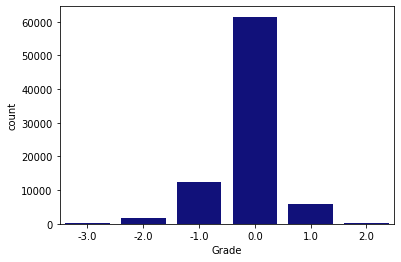

In [56]:
sb.countplot(data=df_pisa_final, x='Grade', color='darkblue');

> Grade is the variable analyzed here, there are no outliers as the data is tidy. I plan on investigating Grade, Overall_Literacy and other factors in conjunction.

### Overall_Literacy Distribution

In [57]:
df_pisa_final[['Overall_Literacy']].describe()

Overall_Literacy
count      81985.000000
mean         501.342492
std           87.244693
min          150.580400
25%          438.459080
50%          501.317380
75%          563.954547
max          826.592027

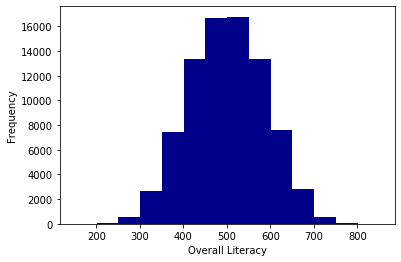

In [58]:
bin_edges = np.arange(df_pisa_final.Overall_Literacy.min(),df_pisa_final.Overall_Literacy.max()+50,50)
plt.hist(data=df_pisa_final, x='Overall_Literacy', bins= bin_edges, color='darkblue');
plt.xlabel('Overall Literacy');
plt.ylabel('Frequency');

> Overall_Literacy is the variable analyzed here, the data seems normally distributed with the peak at 500 interval. I plan on using Overall_Literacy as the dependent variable.

### Average Learning Time Distribution

In [59]:
df_pisa_final[['Average_Learning_Time']].describe()

Average_Learning_Time
count           81985.000000
mean              215.113797
std                81.427004
min                 0.000000
25%               173.333333
50%               201.666667
75%               240.000000
max              2400.000000

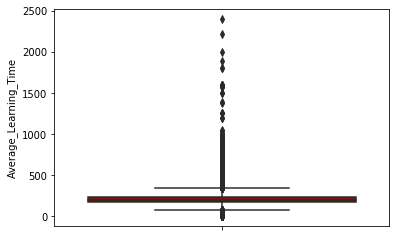

In [60]:
sb.boxplot(y=df_pisa_final['Average_Learning_Time'], color='darkred');

The following code is taken from [here](https://stackoverflow.com/questions/34782063/how-to-use-pandas-filter-with-iqr)

In [61]:
def subset_by_iqr(df, column, whisker_width=1.5):
    """Remove outliers from a dataframe by column, including optional 
       whiskers, removing rows for which the column value are 
       less than Q1-1.5IQR or greater than Q3+1.5IQR.
    Args:
        df (`:obj:pd.DataFrame`): A pandas dataframe to subset
        column (str): Name of the column to calculate the subset from.
        whisker_width (float): Optional, loosen the IQR filter by a
                               factor of `whisker_width` * IQR.
    Returns:
        (`:obj:pd.DataFrame`): Filtered dataframe
    """
    # Calculate Q1, Q2 and IQR
    q1 = df[column].quantile(0.25)                 
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    # Apply filter with respect to IQR, including optional whiskers
    filter = (df[column] >= q1 - whisker_width*iqr) & (df[column] <= q3 + whisker_width*iqr)
    return df.loc[filter]                                                     

# Example for whiskers = 1.5, as requested by the OP
df_pisa_final = subset_by_iqr(df_pisa_final, 'Average_Learning_Time', whisker_width=1.5)

> Average Learning Time (mins/week) is the variable analyzed here, the boxplot shows that there are alot of outliers. The outliers were cleaned using the function created above.

#### After Data Cleaning

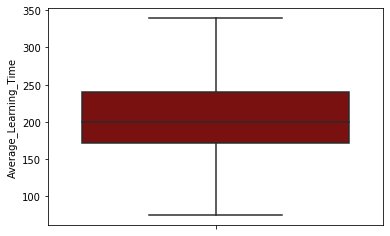

In [62]:
sb.boxplot(y=df_pisa_final['Average_Learning_Time'], color='darkred');

In [63]:
df_pisa_final[['Average_Learning_Time']].describe()

Average_Learning_Time
count           76946.000000
mean              204.214306
std                50.505065
min                74.000000
25%               171.666667
50%               200.000000
75%               240.000000
max               340.000000

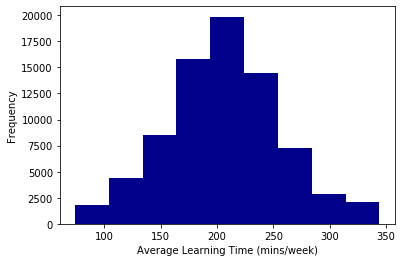

In [64]:
bin_edges = np.arange(df_pisa_final.Average_Learning_Time.min(),df_pisa_final.Average_Learning_Time.max()+10,30)
plt.hist(data=df_pisa_final, x='Average_Learning_Time', bins= bin_edges, color='darkblue');
plt.xlabel('Average Learning Time (mins/week)');
plt.ylabel('Frequency');

> Now after cleaning the data, Average Learning Time's distribution seems normally distributed with the peak at around 200 mark. I plan on investigating how Average Learning Time affects the overall literacy of students.

### Highest Parental Occupational Status Distribution

In [65]:
df_pisa_final.Highest_parental_occupational_status.describe()

count    76946.000000
mean        49.821153
std         21.564517
min         11.010000
25%         29.470000
50%         50.370000
75%         70.340000
max         88.960000
Name: Highest_parental_occupational_status, dtype: float64

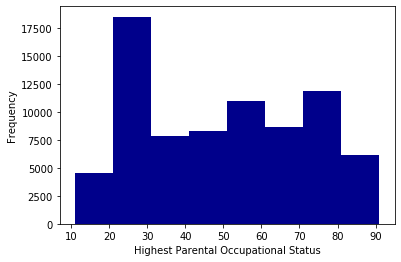

In [66]:
bin_edges = np.arange(df_pisa_final.Highest_parental_occupational_status.min(),df_pisa_final.Highest_parental_occupational_status.max()+5,10)
plt.hist(data=df_pisa_final, x='Highest_parental_occupational_status', bins= bin_edges, color='darkblue');
plt.xlabel('Highest Parental Occupational Status');
plt.ylabel('Frequency');

> Highest parental occupational status is the variable analyzed here, the data is almost evenly spread out with one peak at 20-30 interval. I plan on investigating how Highest parental occupational status affects the overall literacy of students.

### Highest Parental Education in Years Distribution

In [67]:
df_pisa_final.Highest_parental_education_years.describe()

count    76946.000000
mean        13.215183
std          3.144931
min          3.000000
25%         12.000000
50%         13.000000
75%         16.000000
max         18.000000
Name: Highest_parental_education_years, dtype: float64

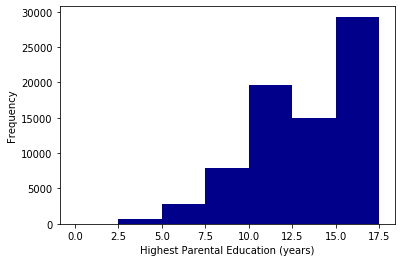

In [68]:
bin_edges = np.arange(0,df_pisa_final.Highest_parental_education_years.max()+2,2.5)
plt.hist(data=df_pisa_final, x='Highest_parental_education_years', bins= bin_edges, color='darkblue');
plt.xlabel('Highest Parental Education (years)');
plt.ylabel('Frequency');

> The variable explored here is Highest Parental Education in years, this variable's distribution is left skewed with the peak at 15-17.5 years interval. I plan on investigating how Highest Parental Education affects the overall literacy of students.

### Time spent on Computer (in mins) Distribution

In [69]:
df_pisa_final[['Computer_use_mins']].describe()

Computer_use_mins
count       76946.000000
mean           52.025096
std            40.148827
min             0.000000
25%            21.000000
50%            41.000000
75%            71.000000
max           206.000000

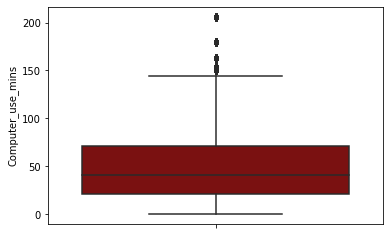

In [70]:
sb.boxplot(y=df_pisa_final['Computer_use_mins'], color='darkred');

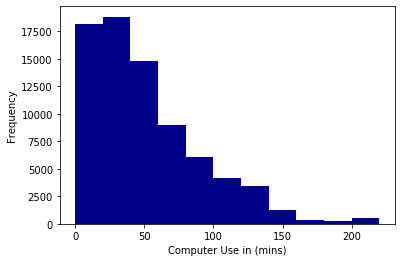

In [71]:
bin_edges = np.arange(0,df_pisa_final.Computer_use_mins.max()+20,20)
plt.hist(data=df_pisa_final, x='Computer_use_mins', bins= bin_edges, color='darkblue');
plt.ylabel('Frequency');
plt.xlabel('Computer Use in (mins)');

> The variable explored here is Computer Use in minutes, this variable's distribution is right skewed with the peak at 25-50 mins interval. I plan on investigating how Computer use affects the overall literacy of students.

### Categorical Variables Investigation Plots

In [72]:
df_pisa_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 76946 entries, 22153 to 475550
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype   
---  ------                                --------------  -----   
 0   Country                               76946 non-null  object  
 1   OECD                                  76946 non-null  category
 2   Gender                                76946 non-null  category
 3   Overall_Literacy                      76946 non-null  float64 
 4   Grade                                 76946 non-null  float64 
 5   Average_Learning_Time                 76946 non-null  float64 
 6   Perseverance_Give_up_easily           76946 non-null  category
 7   Desktop_at_Home                       76946 non-null  category
 8   Portable_Laptop_at_Home               76946 non-null  category
 9   Tablet_Computer_at_Home               76946 non-null  category
 10  Internet_Connection                   76946 non-null  category
 1

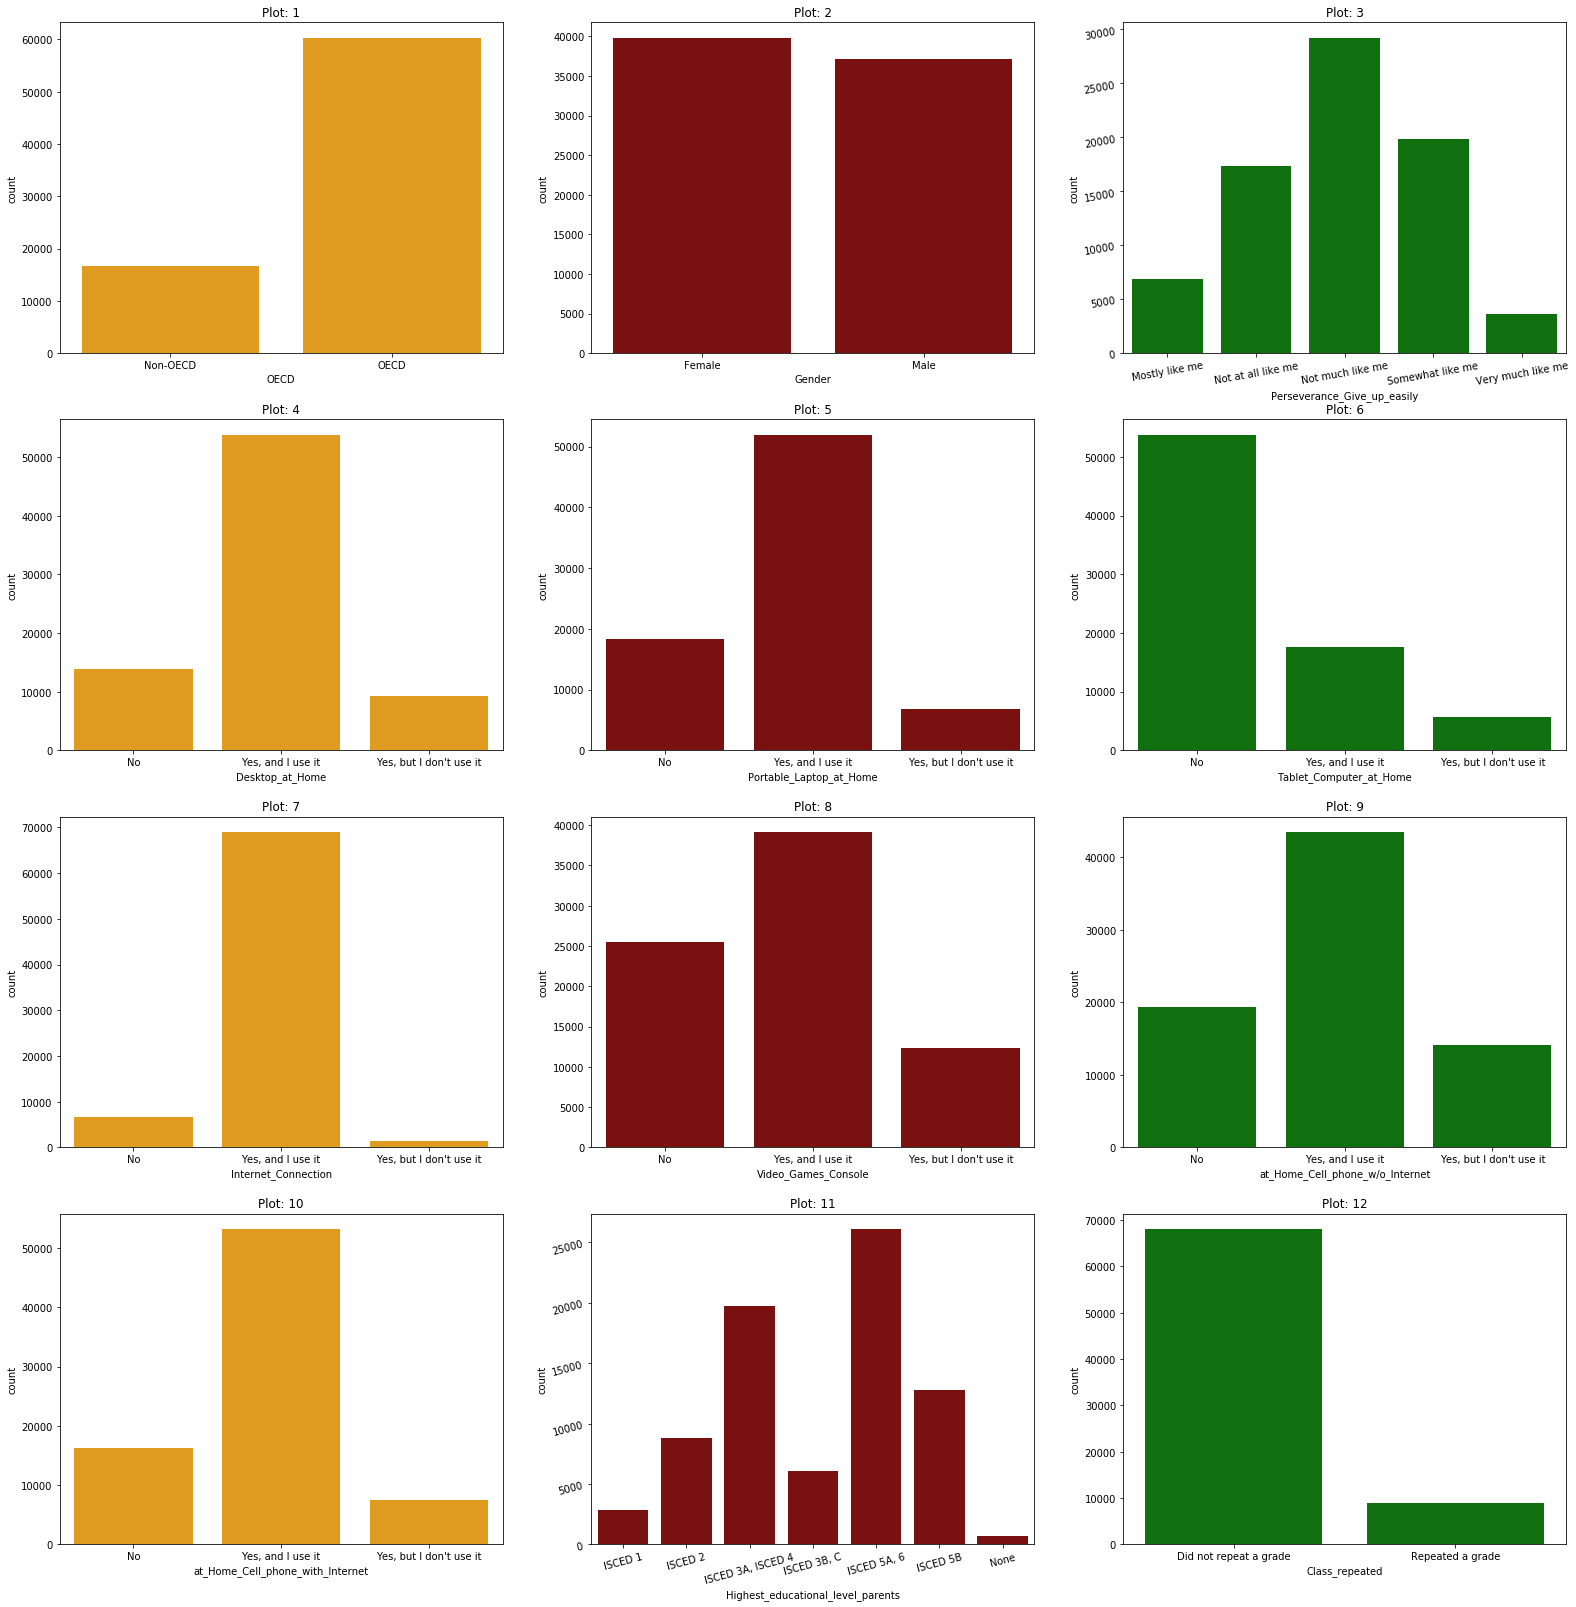

In [73]:
fig, ax = plt.subplots(4,3, figsize=(27, 28))

sb.countplot(data=df_pisa_final, x= 'OECD', color='orange', ax=ax[0][0]);
ax[0][0].title.set_text('Plot: 1')

sb.countplot(data=df_pisa_final, x= 'Gender', color='darkred', ax=ax[0][1]);
ax[0][1].title.set_text('Plot: 2')

sb.countplot(data=df_pisa_final, x= 'Perseverance_Give_up_easily', color='green', ax=ax[0][2]);
ax[0][2].title.set_text('Plot: 3')
ax[0][2].tick_params(labelrotation=10);

sb.countplot(data=df_pisa_final, x= 'Desktop_at_Home', color='orange', ax=ax[1][0]);
ax[1][0].title.set_text('Plot: 4')

sb.countplot(data=df_pisa_final, x= 'Portable_Laptop_at_Home', color='darkred', ax=ax[1][1]);
ax[1][1].title.set_text('Plot: 5')

sb.countplot(data=df_pisa_final, x= 'Tablet_Computer_at_Home', color='green', ax=ax[1][2]);
ax[1][2].title.set_text('Plot: 6')

sb.countplot(data=df_pisa_final, x= 'Internet_Connection', color='orange', ax=ax[2][0]);
ax[2][0].title.set_text('Plot: 7')

sb.countplot(data=df_pisa_final, x= 'Video_Games_Console', color='darkred', ax=ax[2][1]);
ax[2][1].title.set_text('Plot: 8')

sb.countplot(data=df_pisa_final, x= 'at_Home_Cell_phone_w/o_Internet', color='green', ax=ax[2][2]);
ax[2][2].title.set_text('Plot: 9')

sb.countplot(data=df_pisa_final, x= 'at_Home_Cell_phone_with_Internet', color='orange', ax=ax[3][0]);
ax[3][0].title.set_text('Plot: 10')

sb.countplot(data=df_pisa_final, x= 'Highest_educational_level_parents', color='darkred', ax=ax[3][1]);
ax[3][1].title.set_text('Plot: 11')
ax[3][1].tick_params(labelrotation=15)

sb.countplot(data=df_pisa_final, x= 'Class_repeated', color='green', ax=ax[3][2]);
ax[3][2].title.set_text('Plot: 12')

> Plot 1: In this plot a count plot is plotted depicting the count of students from OECD nations vs non-OECD nations. There are more students in OECD nations than the non-OECD ones. I plan on investigating how this variable affects the overall literacy of students.

> Plot 2: In this plot a count plot is plotted depicting the count of male students vs female students. There are marginally more female students than male students. I do plan on investigating this variable with the the overall literacy of students.

> Plot 3: In this plot a count plot is plotted depicting the count of students and their preservence level. Majority of students do not give up easily according to the plot. I plan on investigating how this variable correlates with the overall literacy of students and other quantitative variables.

> Plot 4: In this plot a count plot is plotted depicting the count of students who have desktop at home. Majority of students have desktop at home and they use it according to the plot. I plan on investigating how this variable correlates with the overall literacy of students and other quantitative variables.

> Plot 5: In this plot a count plot is plotted depicting the count of students who have portable laptop at home. Majority of students have portable laptop at home and they use it according to the plot. I plan on investigating how this variable correlates with the overall literacy of students and other quantitative variables.

> Plot 6: In this plot a count plot is plotted depicting the count of students who have tablet computer at home. Majority of students do not have tablet computer at home according to the plot. I plan on investigating how this variable correlates with the overall literacy of students and other quantitative variables.

> Plot 7: In this plot a count plot is plotted depicting the count of students who have internet connection. Majority of students have internet connection and they use it according to the plot. I plan on investigating how this variable correlates with the overall literacy of students and other quantitative variables.

> Plot 8: In this plot a count plot is plotted depicting the count of students who have video games console at home. Majority of students have video games console at home and they use it according to the plot. I plan on investigating how this variable correlates with the overall literacy of students and other quantitative variables.

> Plot 9: In this plot a count plot is plotted depicting the count of students who have cellphone without internet at home. Majority of students have cellphone at home without internet and they use it according to the plot. I plan on investigating how this variable correlates with the overall literacy of students and other quantitative variables.

> Plot 10: In this plot a count plot is plotted depicting the count of students who have cellphone with internet at home. Majority of students have cellphone at home with internet and they use it according to the plot. I plan on investigating how this variable correlates with the overall literacy of students and other quantitative variables.

> Plot 11: In this plot a count plot is plotted depicting the count of parents' highest educational level. Majority of parents have atleast passed ISCED 5A or 6 level according to the plot. I plan on investigating how this variable correlates with the overall literacy of students and other quantitative variables.

> Plot 12: In this plot a count plot is plotted depicting the count of students who have repeated a grade vs not repeated a grade. Majority of students did not repeat a grade according to the plot. I plan on investigating how this variable correlates with the overall literacy of students and other quantitative variables.

## Bivariate Exploration

> In this section, I investigated relationships between pairs of variables discussed earlier in the previous section.

In [74]:
df_pisa_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 76946 entries, 22153 to 475550
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype   
---  ------                                --------------  -----   
 0   Country                               76946 non-null  object  
 1   OECD                                  76946 non-null  category
 2   Gender                                76946 non-null  category
 3   Overall_Literacy                      76946 non-null  float64 
 4   Grade                                 76946 non-null  float64 
 5   Average_Learning_Time                 76946 non-null  float64 
 6   Perseverance_Give_up_easily           76946 non-null  category
 7   Desktop_at_Home                       76946 non-null  category
 8   Portable_Laptop_at_Home               76946 non-null  category
 9   Tablet_Computer_at_Home               76946 non-null  category
 10  Internet_Connection                   76946 non-null  category
 1

In [75]:
chosen_ids = np.random.choice(76946, replace=False, size=10992)
df_trimmed = df_pisa_final.iloc[chosen_ids]
df_trimmed.shape

(10992, 19)

### Country vs Overall Literacy

The code for this plot was taken from [here](https://gist.github.com/fomightez/bb5a9c727d93d1508187677b4d74d7c1).

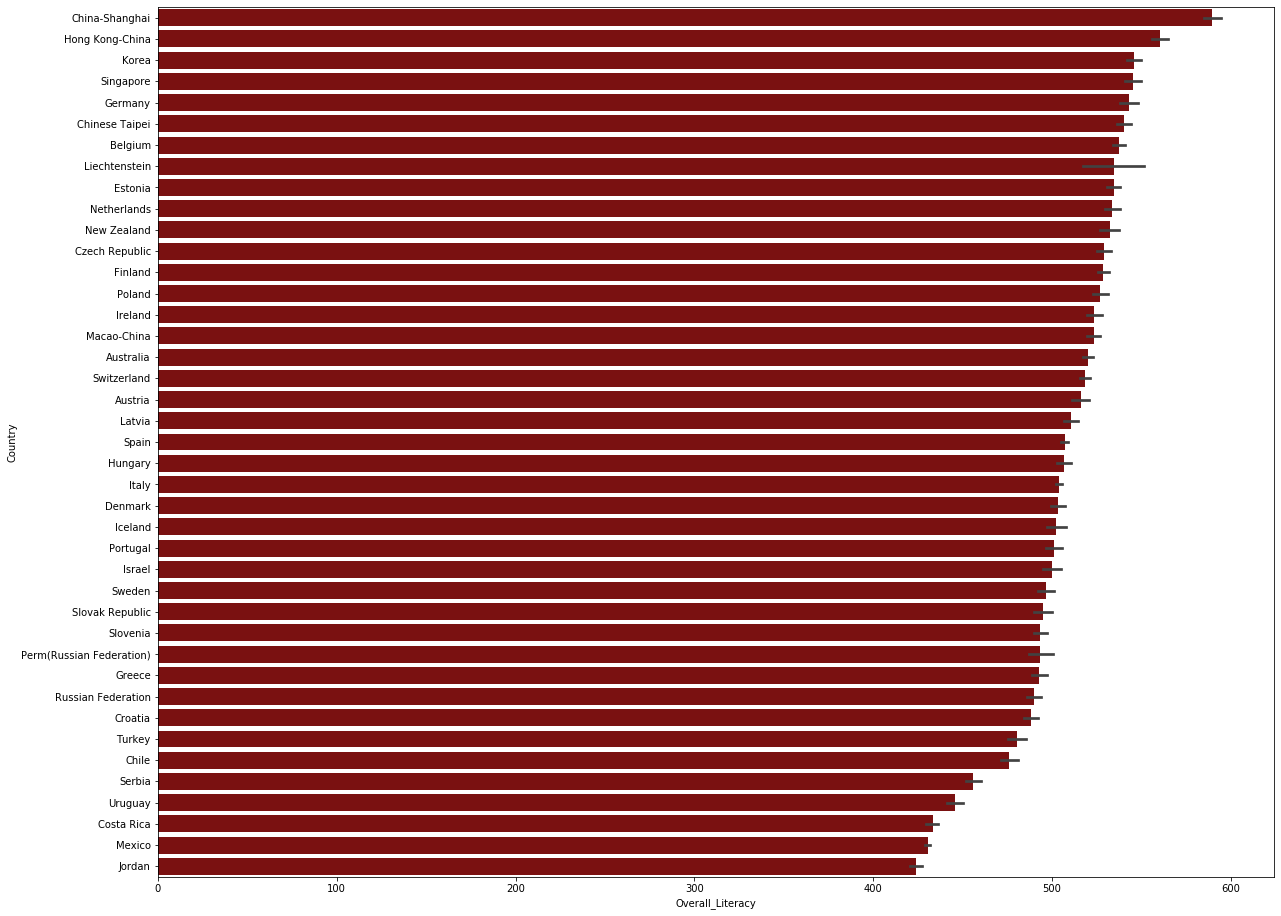

In [76]:
plt.figure(figsize=(20,16))
result = df_pisa_final.groupby(["Country"])['Overall_Literacy'].aggregate(np.mean).reset_index().sort_values('Overall_Literacy', ascending= False)
sb.barplot(x='Overall_Literacy', y="Country", data=df_pisa_final, order=result['Country'], color='darkred');

> China has students who have the highest overall literacy compared to other nations, whereas Jordan has students who have the lowest overall literacy compared to other nations.

### Average Learning Time vs Overall Literacy

> Here, the variables Average Learning Time and Overall Literacy will be analyzed. There is weak positive correlation between the 2 factors. Sampling was used as using the entire dataframe clogged the plot with oversampling. 

In [77]:
(df_pisa_final['Average_Learning_Time'].corr(df_pisa_final['Overall_Literacy'])).round(3)

0.125

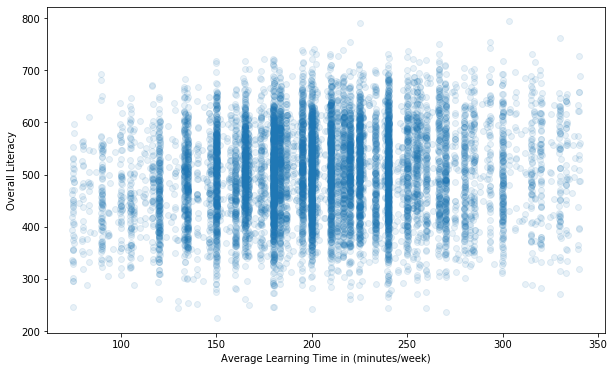

In [78]:
plt.figure(figsize = [10, 6])
sb.regplot(data = df_trimmed, y = 'Overall_Literacy', x = 'Average_Learning_Time', x_jitter=0.4, scatter_kws={'alpha':.1}, fit_reg=False );
plt.xlabel('Average Learning Time in (minutes/week)');
plt.ylabel('Overall Literacy');

### Highest Parental Occupational Status vs Overall Literacy

> Here, the variables Highest Parental Occupational Status and Overall Literacy will be analyzed. There is weak to moderate positive correlation between the 2 factors. Sampling was used as using the entire dataframe clogged the plot with oversampling. 

In [79]:
(df_pisa_final['Highest_parental_occupational_status'].corr(df_pisa_final['Overall_Literacy'])).round(3)

0.351

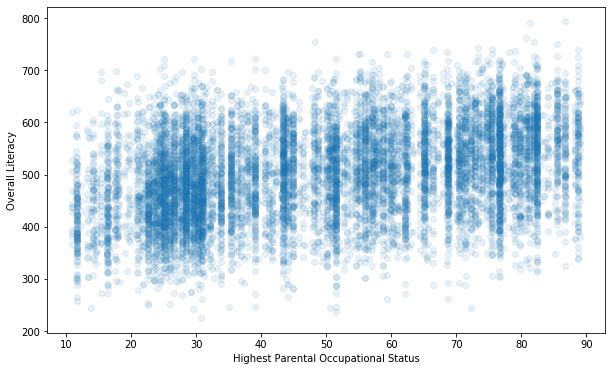

In [80]:
plt.figure(figsize = [10, 6])
sb.regplot(data = df_trimmed, y = 'Overall_Literacy', x = 'Highest_parental_occupational_status', y_jitter=0, scatter_kws={'alpha':.1}, fit_reg=False );
plt.xlabel('Highest Parental Occupational Status');
plt.ylabel('Overall Literacy');

### Highest Parental Education in years vs Overall Literacy

> Here, the variables Highest Parental Education measured in years and Overall Literacy will be analyzed. There is a weak to moderate positive correlation between the 2 factors. Scatter plot was not used as the plot of choice due to the discrete yet continuous nature of the Education factor. The y-scale is scaled from 300 to show the difference in the levels of the x axis factor.

In [81]:
(df_pisa_final['Highest_parental_education_years'].corr(df_pisa_final['Overall_Literacy'])).round(3)

0.277

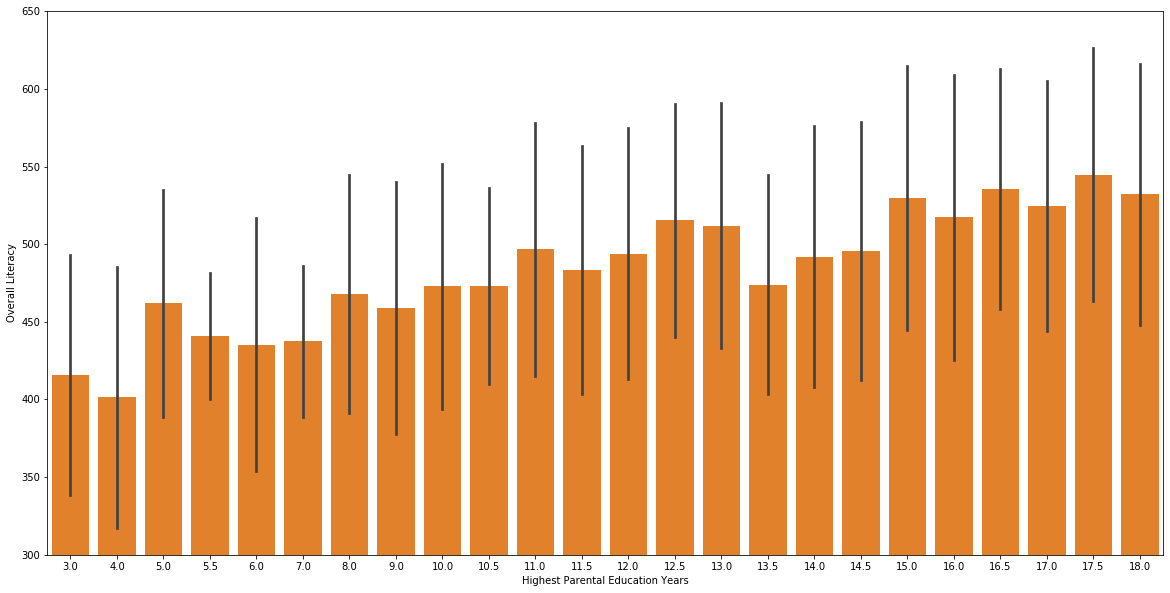

In [82]:
plt.figure(figsize = [20, 10])
base_color = sb.color_palette()[1]
sb.barplot(data=df_pisa_final, x='Highest_parental_education_years', y='Overall_Literacy', color=base_color, ci='sd')#, order=comb_order)
plt.xticks(rotation=0);
plt.ylim(300,650)
plt.xlabel('Highest Parental Education Years');
plt.ylabel('Overall Literacy');

### Grade vs Overall Literacy

> Here, the variables Grade measured on a scale of -3 to 2 and Overall Literacy will be analyzed. The relative grade index (GRADE) was computed to capture between-country variation. It indicates whether students are in the country’s modal grade ie (value of 0) or whether they are below or above the modal grade (+x grades, -x grades). There is a strong positive correlation between the 2 factors. Scatter plot was not used as the plot of choice due to the discrete yet continuous nature of the Grade factor.

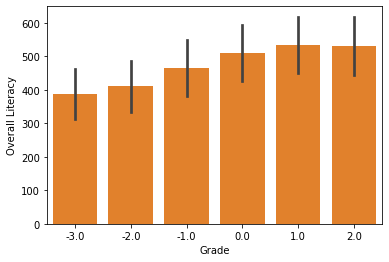

In [83]:
base_color = sb.color_palette()[1]
sb.barplot(data=df_pisa_final, x='Grade', y='Overall_Literacy', color=base_color, ci='sd')
plt.xlabel('Grade');
plt.ylabel('Overall Literacy');

### Computer Use (minutes) vs Overall Literacy

> Here, the variables Computer Use (minutes) and Overall Literacy will be analyzed. There is a weak negative correlation between the 2 factors. Sampling was used as using the entire dataframe clogged the plot with oversampling. 

In [84]:
(df_pisa_final['Computer_use_mins'].corr(df_pisa_final['Overall_Literacy'])).round(3)

-0.046

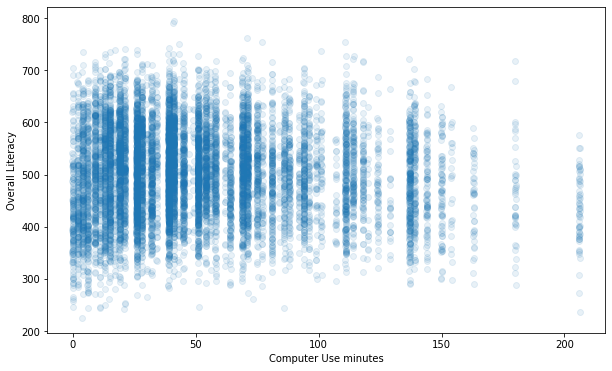

In [85]:
plt.figure(figsize = [10, 6])
sb.regplot(data = df_trimmed, y = 'Overall_Literacy', x = 'Computer_use_mins', x_jitter=0.2, scatter_kws={'alpha':.1}, fit_reg=False );
plt.xlabel('Computer Use minutes');
plt.ylabel('Overall Literacy');

### Categorical Variables: Investigation Plots

> To analyze categorical factors, initial setup was done as shown below. All the categorical factors were plotted against Overall Literacy, to evaluate the effects of each factor on the overall literacy. Only those factors which show a relationship between overall literacy will be discussed below.

In [86]:
ordinal_var_dict = {'OECD': ['OECD','Non-OECD'],
                    'Gender': ['Female','Male'],
                    'Perseverance_Give_up_easily': ['Not much like me', 'Not at all like me','Somewhat like me','Mostly like me', 'Very much like me'],
                    'Desktop_at_Home': ['No',"Yes, but I don't use it",'Yes, and I use it'],
                    'Portable_Laptop_at_Home': ['No',"Yes, but I don't use it",'Yes, and I use it'],
                    'Tablet_Computer_at_Home': ['No',"Yes, but I don't use it",'Yes, and I use it'],
                    'Internet_Connection': ['No',"Yes, but I don't use it",'Yes, and I use it'],
                    'Video_Games_Console': ['No',"Yes, but I don't use it",'Yes, and I use it'],
                    'at_Home_Cell_phone_w/o_Internet': ['No',"Yes, but I don't use it",'Yes, and I use it'],
                    'at_Home_Cell_phone_with_Internet': ['No',"Yes, but I don't use it",'Yes, and I use it'],
                    'Highest_educational_level_parents': ['ISCED 1','ISCED 2','ISCED 3A, ISCED 4', 'ISCED 3B, C', 'ISCED 5B', 'ISCED 5A, 6'],
                    'Class_repeated': ['Did not repeat a grade','Repeated a grade']}

for var in ordinal_var_dict:
    pd_ver = pd.__version__.split(".")
    if (int(pd_ver[0]) > 0) or (int(pd_ver[1]) >= 21): # v0.21 or later
        ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                    categories = ordinal_var_dict[var])
        df_pisa_final[var] = df_pisa_final[var].astype(ordered_var)
    else: # pre-v0.21
        df_pisa_final[var] = df_pisa_final[var].astype('category', ordered = True,
                                             categories = ordinal_var_dict[var])

### Class Repeated vs Average Learning Time

> Here, the variables Average Learning Time (minutes/week) and Class Repeated will be analyzed. Based on the plot, there is no distinctive observation made between the 2 variables.

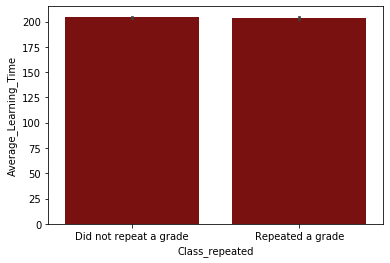

In [87]:
sb.barplot(x='Class_repeated', y="Average_Learning_Time", data=df_pisa_final, color='darkred');

#### Code for Categorical Variables Plots

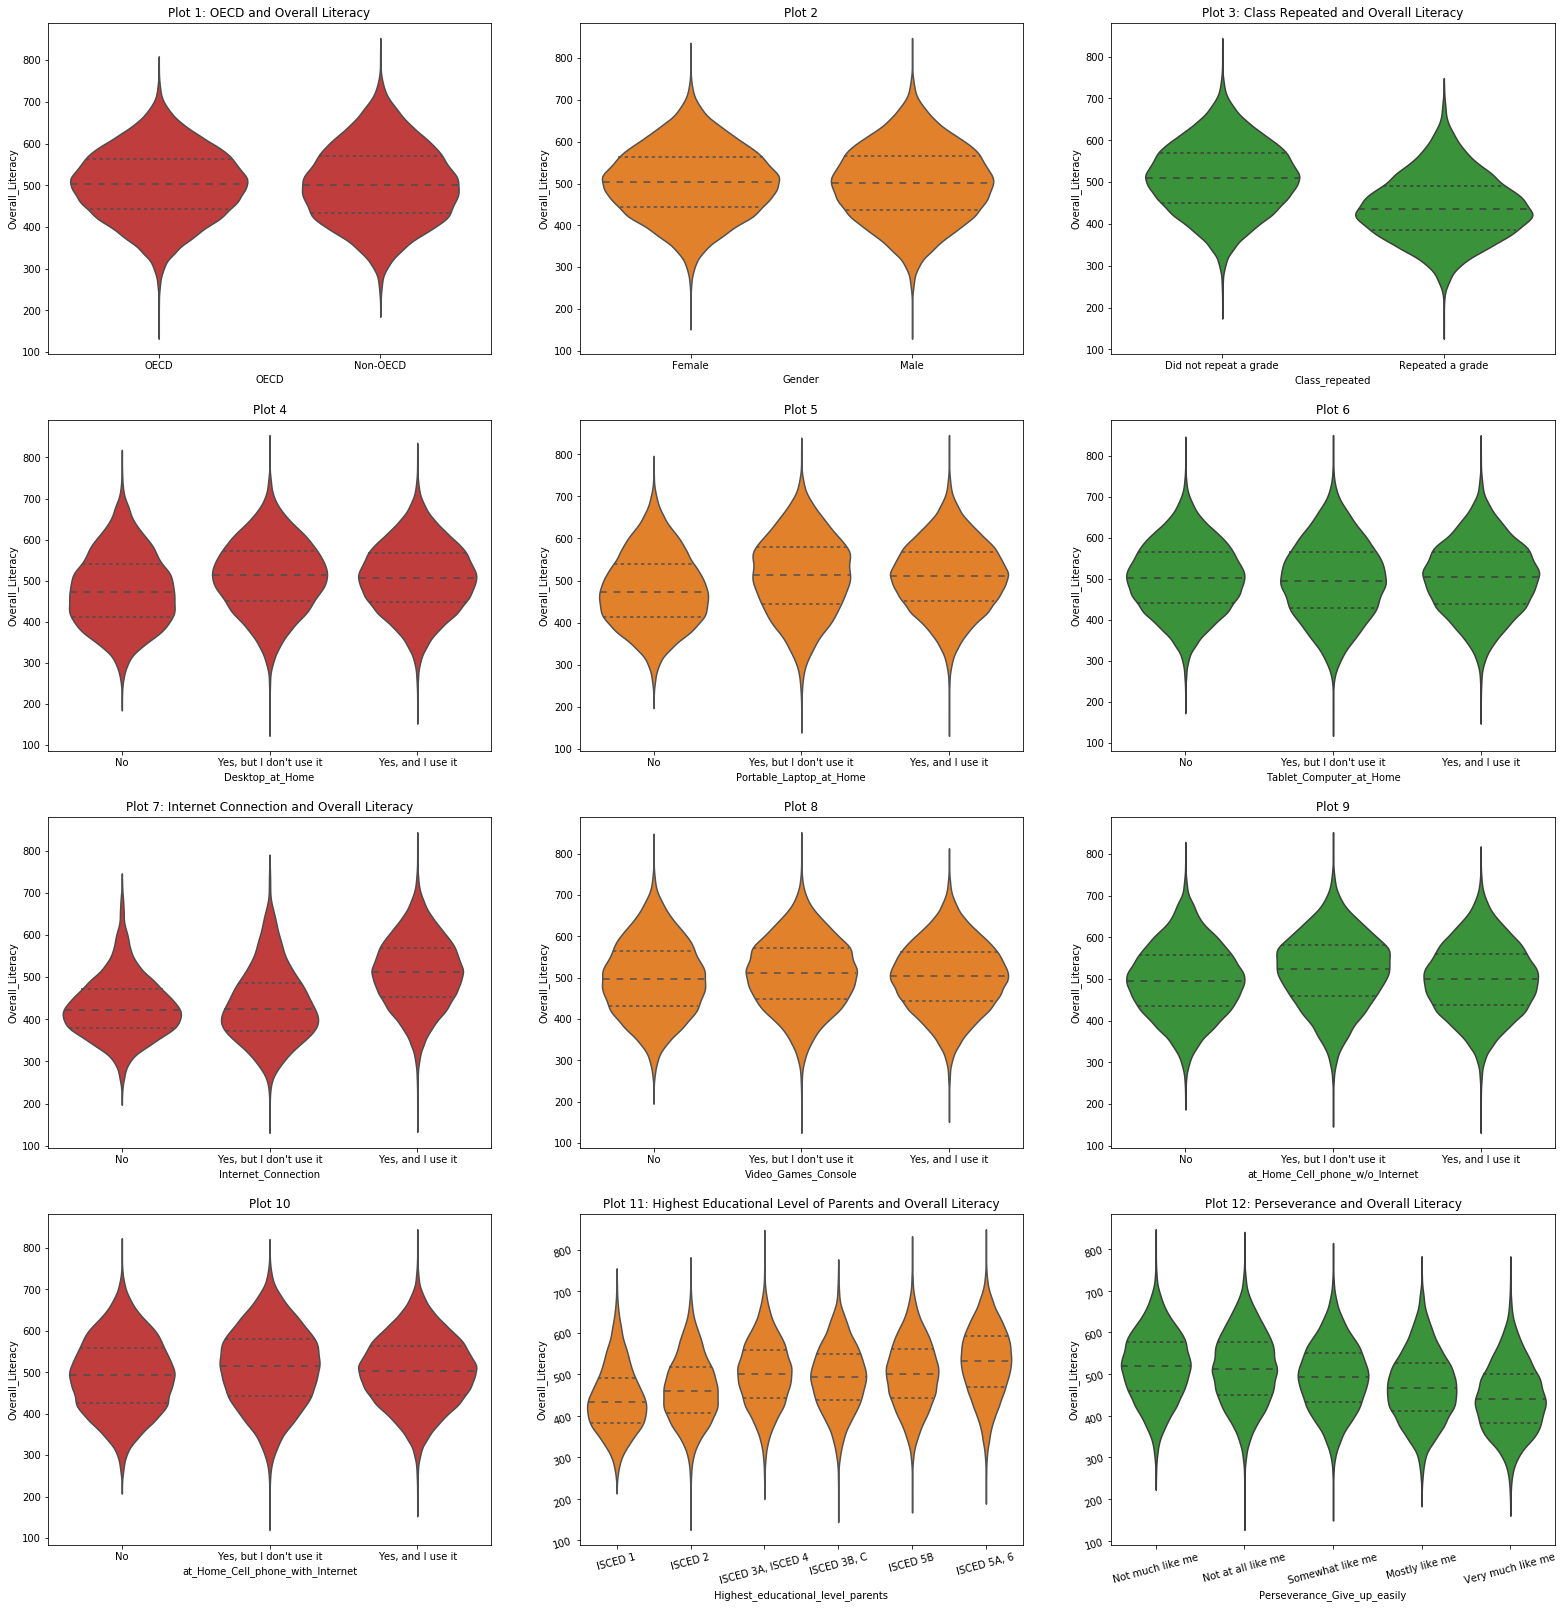

In [88]:
fig, ax = plt.subplots(4,3, figsize=(27, 28))

sb.violinplot(data=df_pisa_final, x='OECD', y='Overall_Literacy', color=sb.color_palette()[3], inner='quartile',ax=ax[0][0])
ax[0][0].title.set_text('Plot 1: OECD and Overall Literacy')

sb.violinplot(data=df_pisa_final, x='Gender', y='Overall_Literacy', color=sb.color_palette()[1], inner='quartile',ax=ax[0][1])
ax[0][1].title.set_text('Plot 2')

sb.violinplot(data=df_pisa_final, x='Class_repeated', y='Overall_Literacy', color=sb.color_palette()[2], inner='quartile',ax=ax[0][2])
ax[0][2].title.set_text('Plot 3: Class Repeated and Overall Literacy')
ax[0][2].tick_params(labelrotation=0);

sb.violinplot(data=df_pisa_final, x='Desktop_at_Home', y='Overall_Literacy', color=sb.color_palette()[3], inner='quartile',ax=ax[1][0])
ax[1][0].title.set_text('Plot 4')

sb.violinplot(data=df_pisa_final, x='Portable_Laptop_at_Home', y='Overall_Literacy', color=sb.color_palette()[1], inner='quartile',ax=ax[1][1])
ax[1][1].title.set_text('Plot 5')

sb.violinplot(data=df_pisa_final, x='Tablet_Computer_at_Home', y='Overall_Literacy', color=sb.color_palette()[2], inner='quartile',ax=ax[1][2])
ax[1][2].title.set_text('Plot 6')

sb.violinplot(data=df_pisa_final, x='Internet_Connection', y='Overall_Literacy', color=sb.color_palette()[3], inner='quartile',ax=ax[2][0])
ax[2][0].title.set_text('Plot 7: Internet Connection and Overall Literacy')

sb.violinplot(data=df_pisa_final, x='Video_Games_Console', y='Overall_Literacy', color=sb.color_palette()[1], inner='quartile',ax=ax[2][1])
ax[2][1].title.set_text('Plot 8')

sb.violinplot(data=df_pisa_final, x='at_Home_Cell_phone_w/o_Internet', y='Overall_Literacy', color=sb.color_palette()[2], inner='quartile',ax=ax[2][2])
ax[2][2].title.set_text('Plot 9')

sb.violinplot(data=df_pisa_final, x='at_Home_Cell_phone_with_Internet', y='Overall_Literacy', color=sb.color_palette()[3], inner='quartile',ax=ax[3][0])
ax[3][0].title.set_text('Plot 10')

sb.violinplot(data=df_pisa_final, x='Highest_educational_level_parents', y='Overall_Literacy', color=sb.color_palette()[1], inner='quartile',ax=ax[3][1])
ax[3][1].title.set_text('Plot 11: Highest Educational Level of Parents and Overall Literacy')
ax[3][1].tick_params(labelrotation=15)

sb.violinplot(data=df_pisa_final, x='Perseverance_Give_up_easily', y='Overall_Literacy', color=sb.color_palette()[2], inner='quartile',ax=ax[3][2])
ax[3][2].title.set_text('Plot 12: Perseverance and Overall Literacy')
ax[3][2].tick_params(labelrotation=15);

**Observations:**

> Plot 1: In this plot a violin plot is plotted, where the x-axis holds OECD variable and the y-axis holds the overall literacy values. The plot depicts that students from OECD nations compared to students in non-OECD nations seems to have more or less a similar overall literacy.

> Plot 3: In this plot a violin plot is plotted, where the x-axis holds repeated a grade vs not repeated a grade variable and the y-axis holds the overall literacy values. The plot depicts that students who did not repeat a grade did far better in overall literacy compared to students who did repeat a grade.

> Plot 4 & 5: In these plots a violin plot is plotted, since both these plots are nearly identical hence it is best to discuss them together. Plot 4 shows the relationship between students having desktop at home and how that is correlated with overall literacy. Plot 5 shows the same thing but instead of desktop it looks at portable laptop at home. The x-axis holds 3 choices i)'No', ii) "Yes, but I don't use it", iii) 'Yes, and I use it' and the y-axis holds the overall literacy values. The plots depict that those students who had a desktop and/or a portable laptop at home did far better in overall literacy compared to students who did not have them. 

> Plot 7: In this plot a violin plot is plotted. The plot shows a relationship between students who have internet connection vs those who don't and how that correlated with overall literacy. The x-axis holds 3 choices i)'No', ii) "Yes, but I don't use it", iii) 'Yes, and I use it' and the y-axis holds the overall literacy values. The plot depicts that those students who have internet connection and use it did far better in overall literacy compared to students who did not have it or to those who did have it but don't use it. 

> Plot 11: In this plot a violin plot is plotted, where the x-axis holds parents' highest educational levels and the y-axis holds the overall literacy values of students. The plot depicts that as the parent's highest educational levels increase the students' overall literacy increased aswell.

> Plot 12: In this plot a violin plot is plotted, where the x-axis holds preseverance levels of students and the y-axis holds the overall literacy values of students. The plot depicts that as the perseverance level decreases (giving up ability increases) resulting in students' overall literacy to decrease.

## Multivariate Exploration

> In this section plots of three or more variables were created to investigate the data even further.

#### Variables to Evaluate:

##### Non-Categorical Variables with Overall Literacy:
> Country vs Overall Literacy

> Average Learning Time vs Overall Literacy (corr = 0.125)

> Highest Parental Occupational Status vs Overall Literacy (corr = 0.351)

> Highest Parental Education in years vs Overall Literacy (corr = 0.277)

##### Categorical Variables with Overall Literacy:
> Class Repeated and Overall Literacy

> Internet Connection and Overall Literacy

> Highest Educational Level of Parents and Overall Literacy

> Perseverance and Overall Literacy

#### 2 Quantitative and 1 Categorical Variables: 
##### Highest Parental Occupational Status vs Overall Literacy and Internet Connection

> In this plot, the variables investigated are shown below:
> * Highest Parental Occupational Status (Quantitative)
> * Overall Literacy (Quantitative)
> * Internet Connection (Categorical)

Having 2 Quantitative and 1 Categorical variable, a scatter plot would be best fit for this type of setup. Due to over sampling, random sample of the data was used to better depict the trend on the plot. On the x-axis is the variable "Highest Parental Occupational Status" and on y-axis is the variable "Overall Literacy" and with the color encoding being "Internet Connection". 

As the Parents' occupational status increase so does the student's overall literacy, with that more and more students have access to internet. The right side of the plot has majority of students using internet whereas, as the parents' occupational status decrease so does the student's overall literacy, with that less and less students have access to internet.

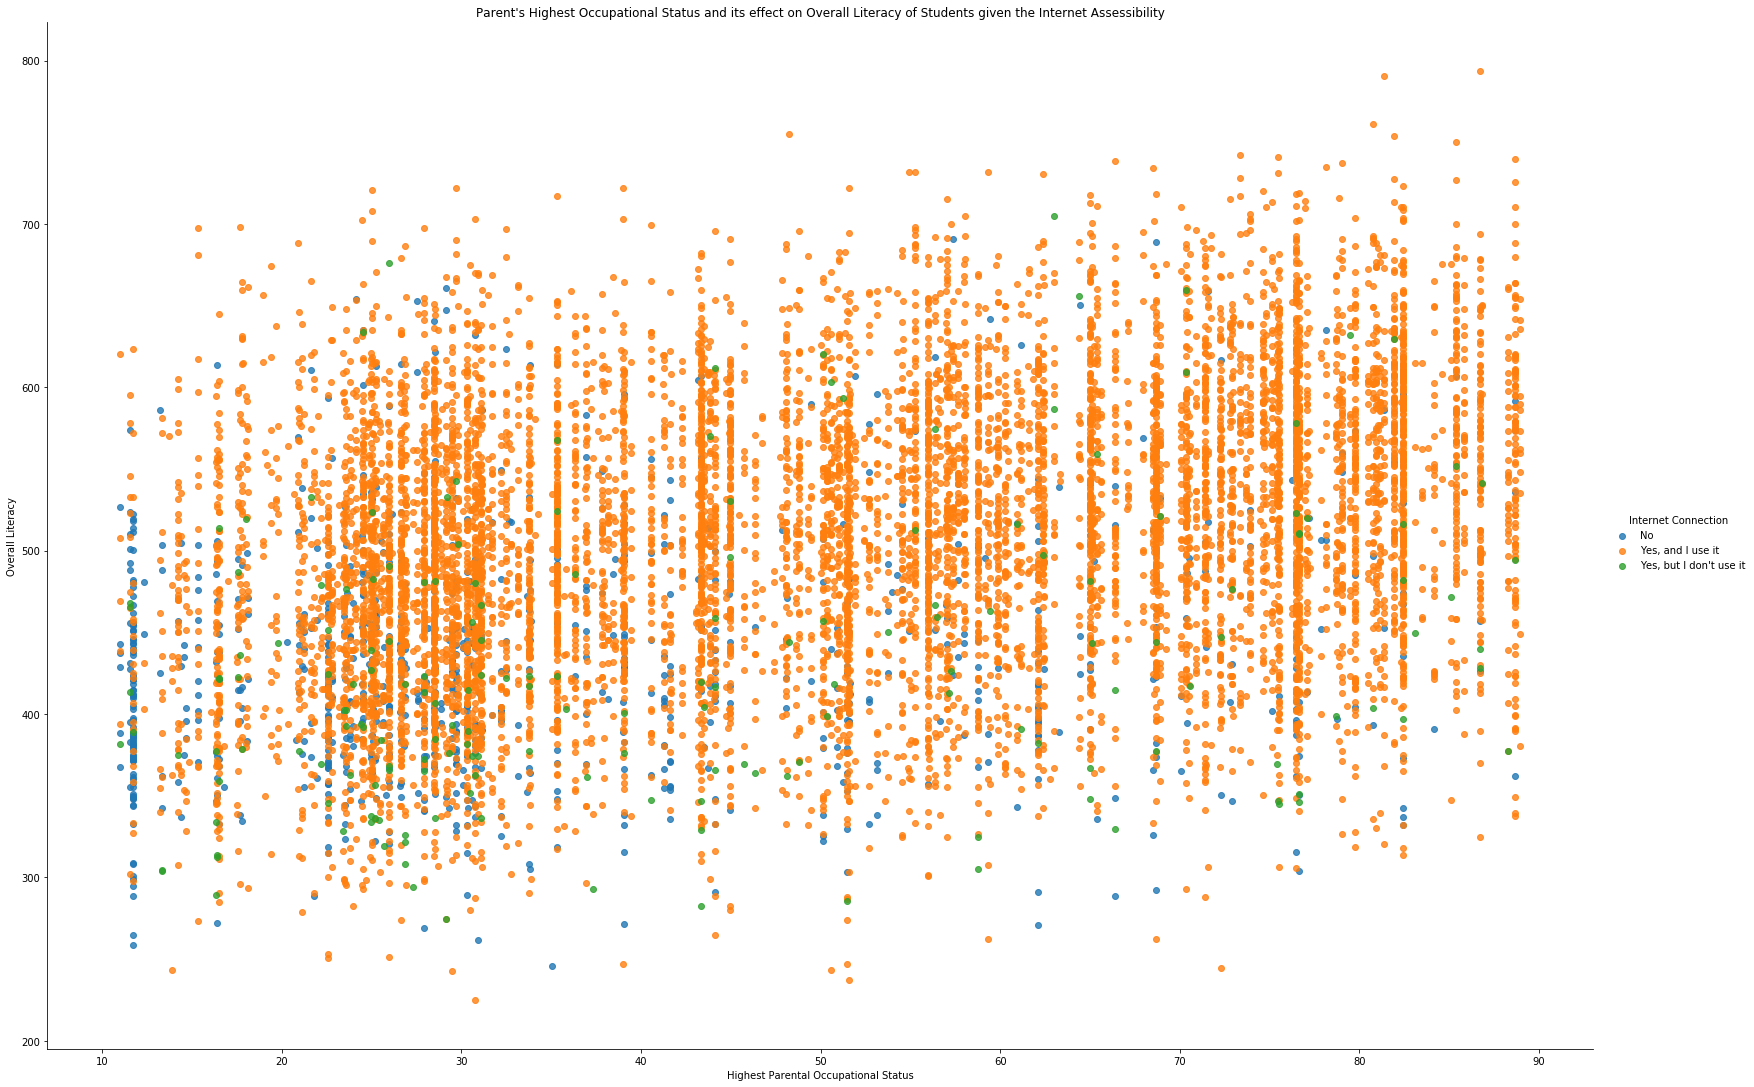

In [89]:
g = sb.FacetGrid(data = df_trimmed, hue = 'Internet_Connection', size = 15, aspect=1.5)
g.map(plt.scatter, 'Highest_parental_occupational_status', 'Overall_Literacy', alpha=.8)
plt.title("Parent's Highest Occupational Status and its effect on Overall Literacy of Students given the Internet Assessibility")
plt.xlabel('Highest Parental Occupational Status')
plt.ylabel('Overall Literacy')
g.add_legend(title ='Internet Connection');
plt.rcParams.update({'font.size': 17});

#### 2 Quantitative and 1 Categorical Variable: 
##### Highest Parental Occupational Status vs Overall Literacy and Class Repeated

> In this plot, the variables investigated are shown below:
> * Highest Parental Occupational Status (Quantitative)
> * Overall Literacy (Quantitative)
> * Class Repeated (Categorical)

Having 2 Quantitative and 1 Categorical variable, a scatter plot would be best fit for this type of setup. Due to over sampling, random sample of the data was used to better depict the trend on the plot. On the x-axis is the variable "Highest Parental Occupational Status" and on y-axis is the variable "Overall Literacy" and with the color encoding being "Class Repeated". 

As the Parents' occupational status increase so does the student's overall literacy, with that less and less students have repeated a class. The right side of the plot has majority of students who did not repeat a class whereas, as the parents' occupational status decrease so does the student's overall literacy, with that more and more students repeated a grade.

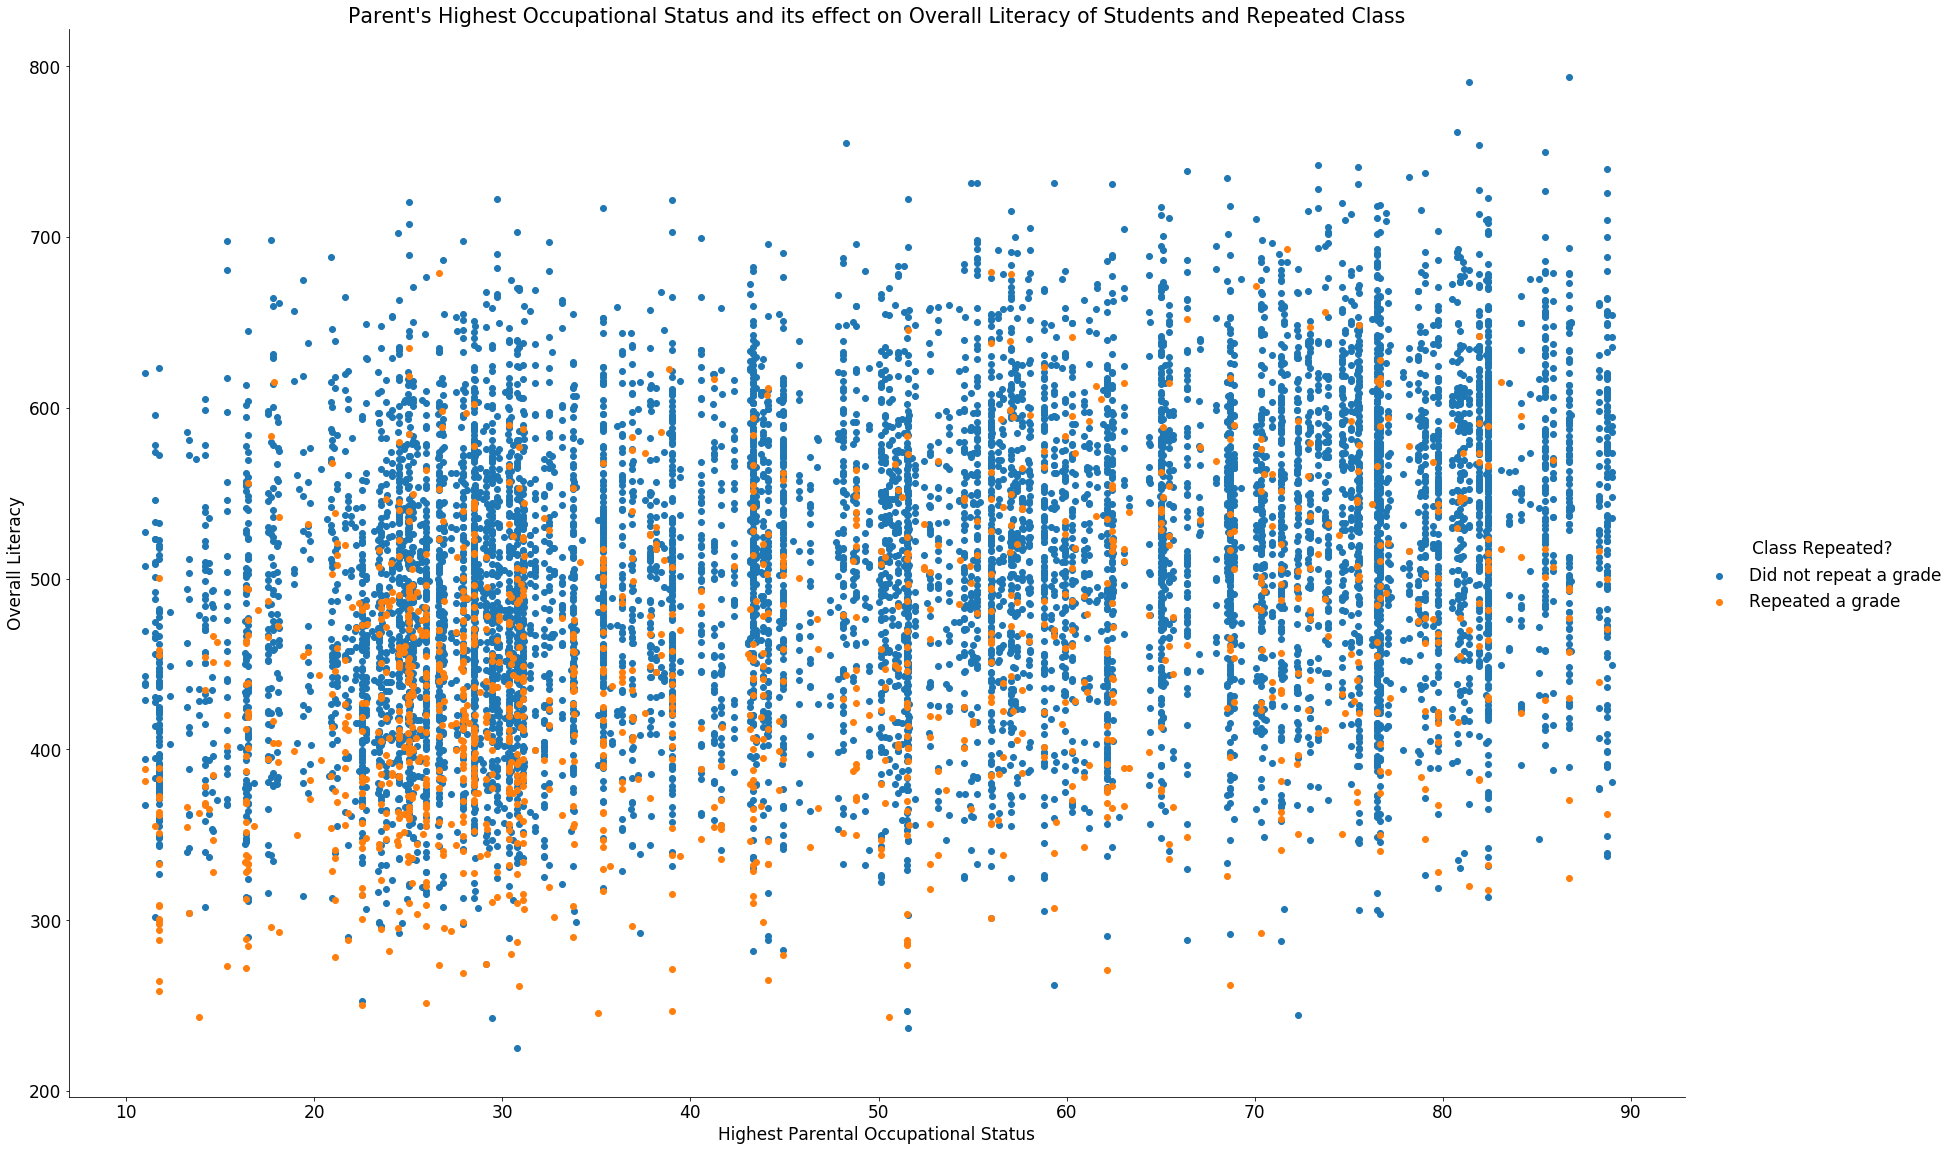

In [90]:
g = sb.FacetGrid(data = df_trimmed, hue = 'Class_repeated', size = 16, aspect=1.5)
g.map(plt.scatter, 'Highest_parental_occupational_status', 'Overall_Literacy', alpha=1)
plt.title("Parent's Highest Occupational Status and its effect on Overall Literacy of Students and Repeated Class")
plt.xlabel('Highest Parental Occupational Status')
plt.ylabel('Overall Literacy')
g.add_legend(title ='Class Repeated?');
plt.rcParams.update({'font.size': 16});

#### 3 Quantitative Variables: 
##### Highest Parental Occupational Status vs Overall Literacy and Grade

> In this plot, the variables investigated are shown below:
> * Highest Parental Occupational Status (Quantitative)
> * Overall Literacy (Quantitative)
> * Grade (Quantitative)

Having 3 Quantitative variables, a scatter plot would be best fit for this type of setup. Due to over sampling, random sample of the data was used to better depict the trend on the plot. On the x-axis is the variable "Highest Parental Occupational Status" and on y-axis is the variable "Overall Literacy" and with the color encoded bar on the right representing "Grade". 

The variable Grade is compared to modal grade in country. The relative grade index (Grade) was computed to capture between-country variation. It indicates whether students are in the country’s a modal grade ie (value of 0) or whether they are below or above the modal grade (-x grades, +x grades).

As the Parents' occupational status increase so does the student's overall literacy, with that students' modal grades have stayed the same as the the country's modal grade if not few of the grades being above the modal grade. The right side of the plot has majority of students who are in the country’s modal grade if not above the modal grade. Whereas, as the parents' occupational status decrease so does the student's overall literacy, with that more and more students are below the modal grade.

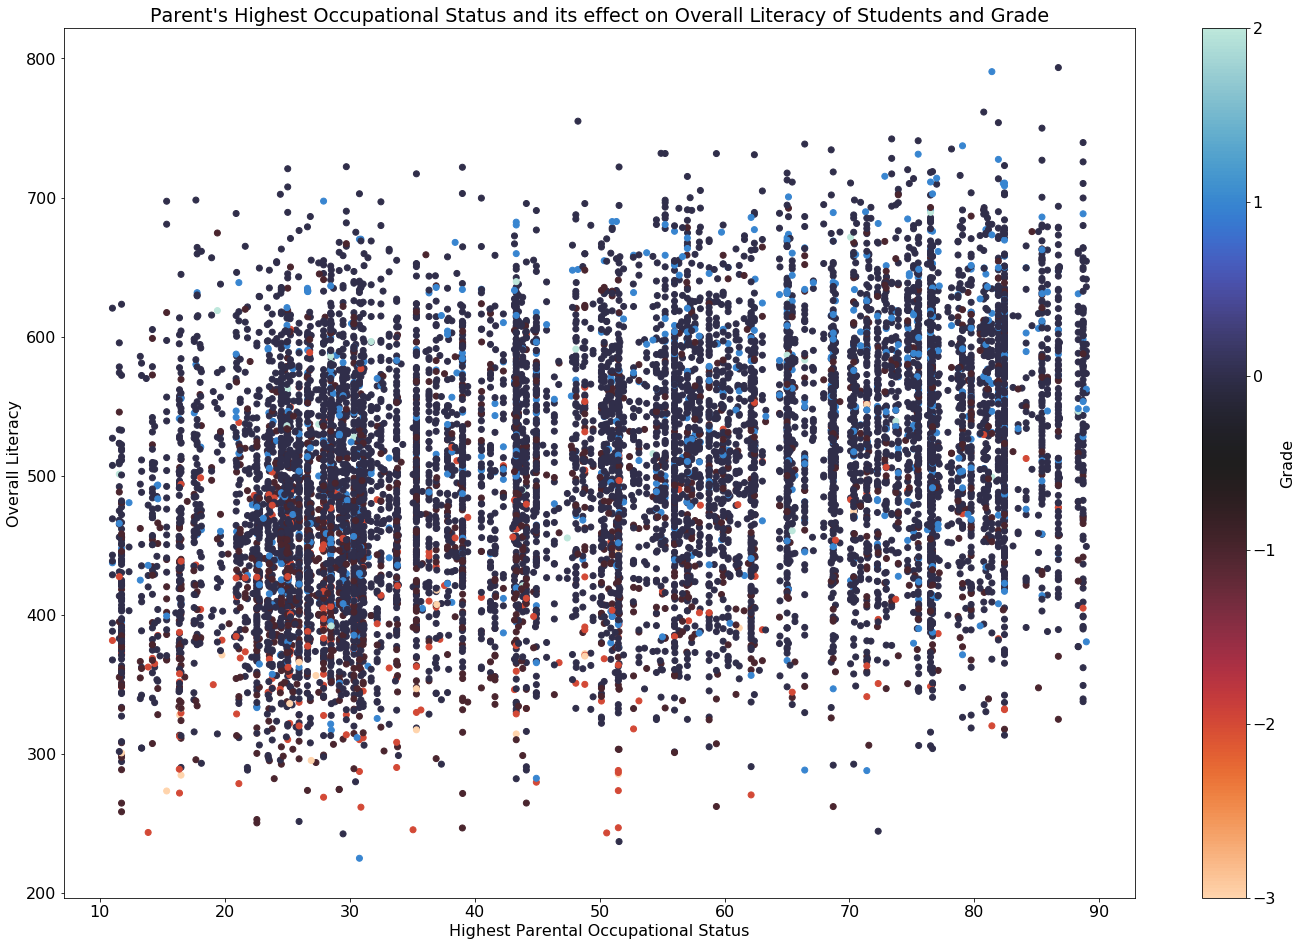

In [91]:
plt.figure(figsize = [24, 16])
plt.scatter(data = df_trimmed, x = 'Highest_parental_occupational_status', y = 'Overall_Literacy', c = 'Grade',
            cmap = 'icefire_r', alpha=1)
plt.title("Parent's Highest Occupational Status and its effect on Overall Literacy of Students and Grade")
plt.xlabel('Highest Parental Occupational Status')
plt.ylabel('Overall Literacy')
plt.colorbar(label = 'Grade');
#mako_r

#### 3 Quantitative Variables: 
##### Highest Parental Occupational Status vs Overall Literacy and Highest Parental Education (years)

> In this plot, the variables investigated are shown below:
> * Highest Parental Occupational Status (Quantitative)
> * Overall Literacy (Quantitative)
> * Highest Parental Education in years (Quantitative)

Having 3 Quantitative variables, a scatter plot would be best fit for this type of setup. Due to over sampling, random sample of the data was used to better depict the trend on the plot. On the x-axis is the variable "Highest Parental Occupational Status" and on the y-axis is the variable "Overall Literacy" and with the color bar encoding representing "Highest Parental Education in years". 

As visible in the plot Parents' occupational status is positively correlated with Highest Parental Education with an increase in both the variables there is an increase in the students' overall literacy. As visible on the right side of the plot, students' overall literacy tends to be the highest when parental occupational status and parents' education in years is at the maximum.

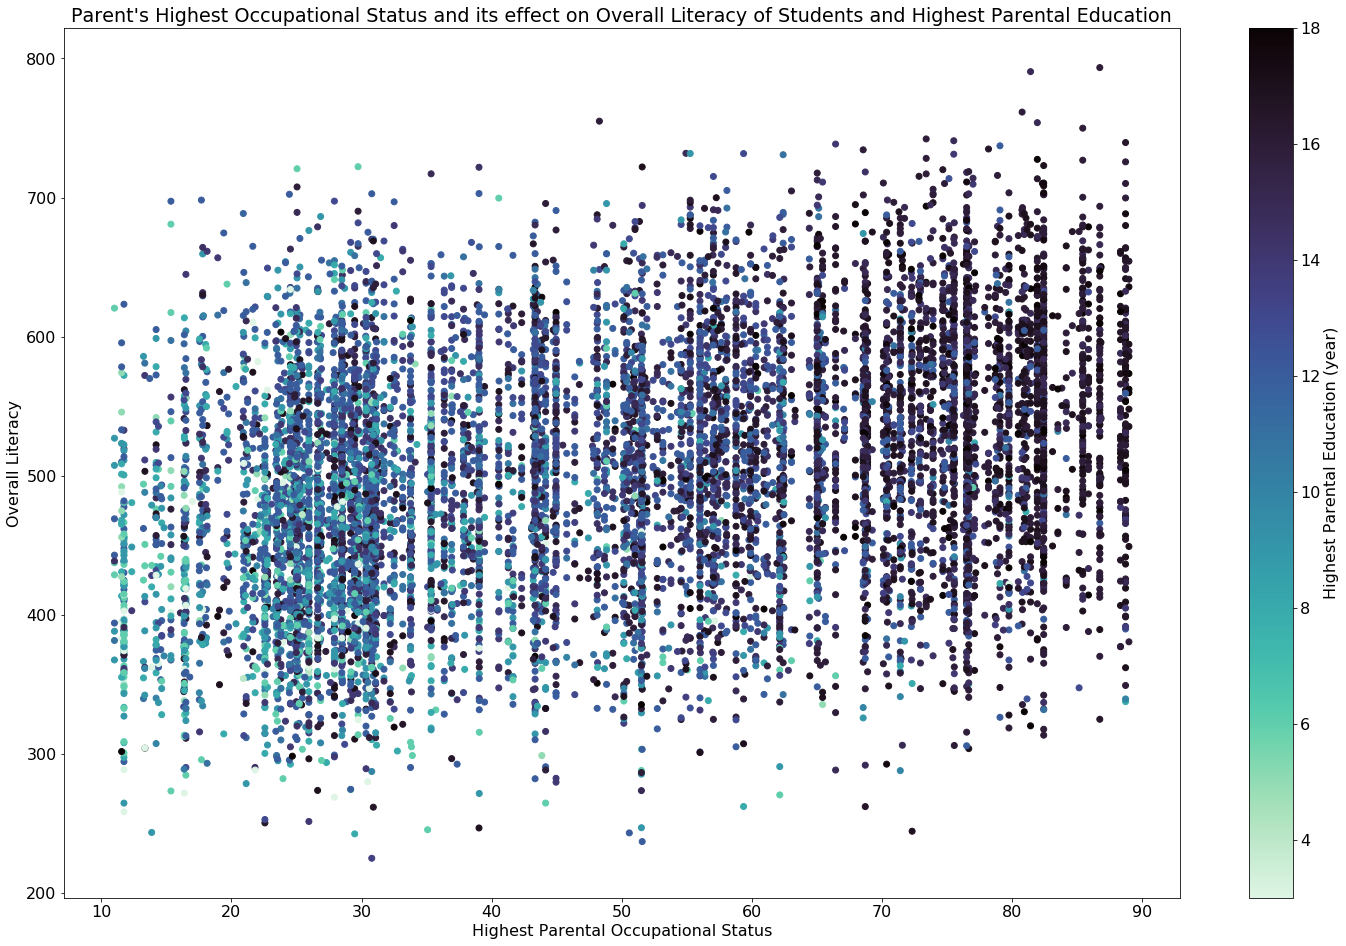

In [92]:
plt.figure(figsize = [25, 16])
plt.scatter(data = df_trimmed, x = 'Highest_parental_occupational_status', y = 'Overall_Literacy', c = 'Highest_parental_education_years',
            cmap = 'mako_r', alpha=1)
plt.title("Parent's Highest Occupational Status and its effect on Overall Literacy of Students and Highest Parental Education")
plt.xlabel('Highest Parental Occupational Status')
plt.ylabel('Overall Literacy')
plt.colorbar(label = 'Highest Parental Education (year)');

#### Plot 1 of 2: 1A
#### 2 Categorical and 1 Quantitative Variable
##### Perseverance vs Class Repeated vs Overall Literacy

> In this plot, the variables investigated are shown below:
> * Class Repeated (Categorical)
> * Overall Literacy (Quantitative)
> * Perseverance (Categorical)

Having 2 categorical and 1 Quantitative variables, a barplot would be the best fit for this type of setup. On the x-axis is the variable "Class Repeated" and on y-axis is the variable "Overall Literacy" and with the color encoding on the right representing "Perseverance" scale. 

As visible in the plot students who didn't give up easily tend to have the highest overall literacy given they didn't repeat a grade/class. For the variable "Class Repeated" similar downwards staircase pattern is found from the left most bar to the right most bar depicting that as students give up easily the lower the overall literacy. This plot gives a way to investigating another relatioship that is to find out the count of students for the respective perseverance level and class repeated category. This plot can be found below (plot 1B).

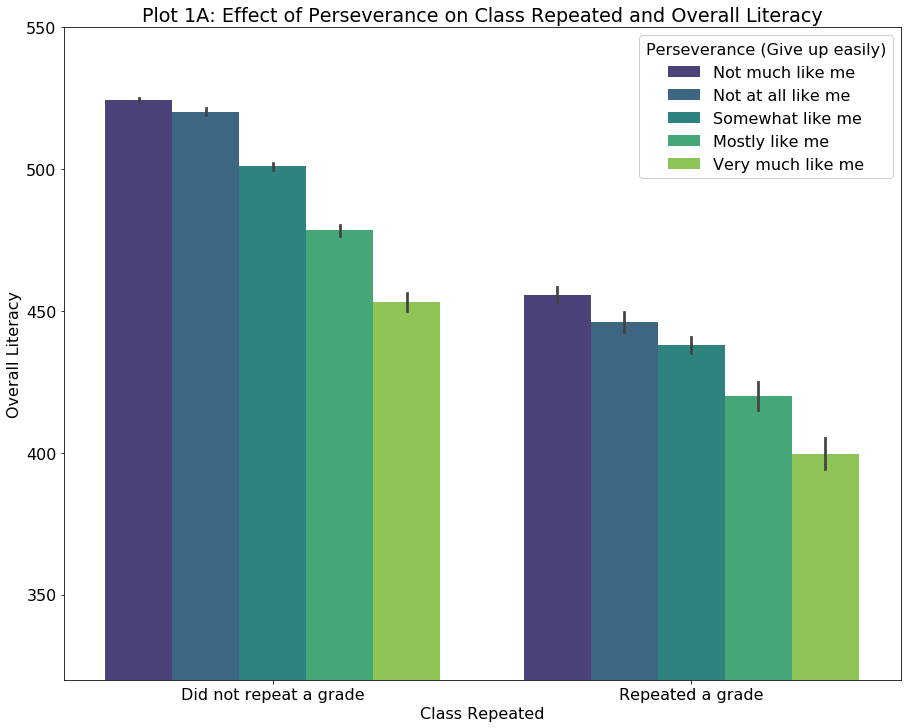

In [93]:
plt.figure(figsize = [15, 12])
ax = sb.barplot(data = df_pisa_final, x = 'Class_repeated', y = 'Overall_Literacy', hue = 'Perseverance_Give_up_easily', palette='viridis')
ax.legend(loc = 1, ncol = 1, framealpha = 1, title = 'Perseverance (Give up easily)')
plt.title('Plot 1A: Effect of Perseverance on Class Repeated and Overall Literacy')
plt.xlabel('Class Repeated')
plt.ylabel('Overall Literacy')
ax.set_ylim([320,550]);

#### Plot 2 of 2: 1B
#### 2 Categorical and 1 Quantitative Variable
##### Perseverance vs Class Repeated vs Count of Students

> In this plot, the variables investigated are shown below:
> * Class Repeated (Categorical)
> * Count of Students (Quantitative)
> * Perseverance (Categorical)

Continuing from the previous plot, this plot has the same configurations with the exception of the y-axis where this axis holds "Count of Students" variable.

There is an interesting observation, although normally you think those who are giving up easily tend to repeat a grade/class. But as shown below as per the survey results, the count of students giving up easily given they repeated a grade is much less than those who give up easily given they didn't repeat a grade. To combat this irregular observation, I would suggest more data samples to be gathered and to evaluate this factor more thoroghly.

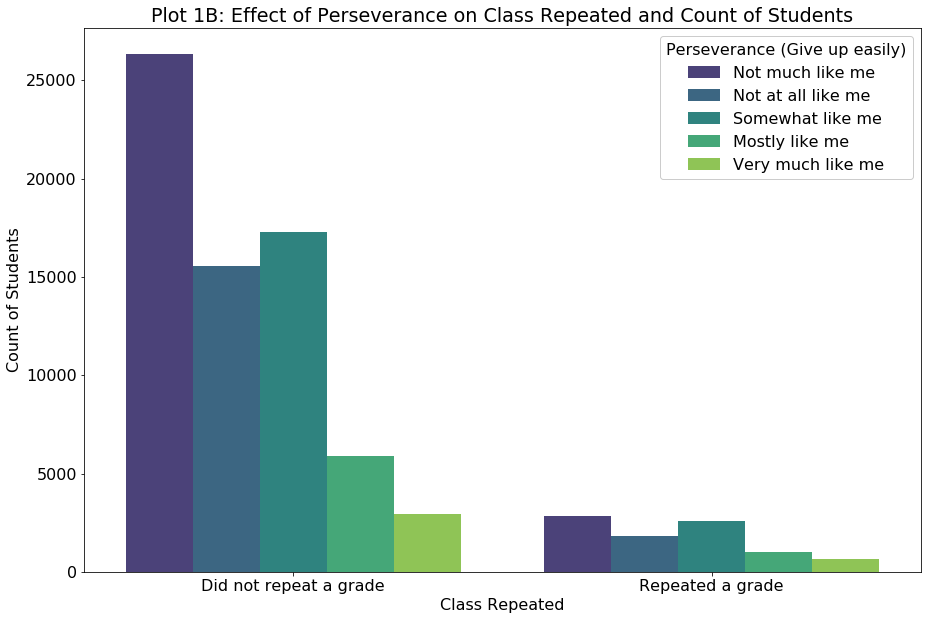

In [94]:
plt.figure(figsize = [15, 10])
ax = sb.countplot(data = df_pisa_final, x = 'Class_repeated', hue = 'Perseverance_Give_up_easily', palette='viridis')
ax.legend(loc = 1, ncol = 1, framealpha = 1, title = 'Perseverance (Give up easily)');
plt.title('Plot 1B: Effect of Perseverance on Class Repeated and Count of Students');
plt.xlabel('Class Repeated')
plt.ylabel('Count of Students');

#### 2 Categorical and 1 Quantitative Variable
##### Highest Educational Level of Parents vs Class Repeated vs Overall Literacy

> In this plot, the variables investigated are shown below:
> * Class Repeated (Categorical)
> * Overall Literacy (Quantitative)
> * Highest Educational Level of Parents (Categorical)

Having 2 categorical and 1 Quantitative variables, a barplot would be the best fit for this type of setup. On the x-axis is the variable "Class Repeated" and on y-axis is the variable "Overall Literacy" and with the color encoding on the right representing "Highest Educational Level of Parents" scale. 

As visible in the plot, students with parents' who have high education level tend to have higher overall literacy given those students did not repeat a grade. As for those who did repeat a grade similar pattern is followed.

A surprising observation was found for students who did not repeat a grade, those students had higher overall literacy for whose parents had atleast an ISCED 3, ISCED 4 education level as compated to those parents who had ISCED 3B, C and even ISCED 5B level as shown in the plot below. Common logic says that as education level of parents increase so should the overall literacy of students but an uncommon observation was found as discussed earlier. Similar patterns can be found for the students who did repeat a grade but instead student whose parents had atleast an ISCED 3B education level have higher overall literacy than whose parents had ISCED 5B educationn level as shown in the plot below.

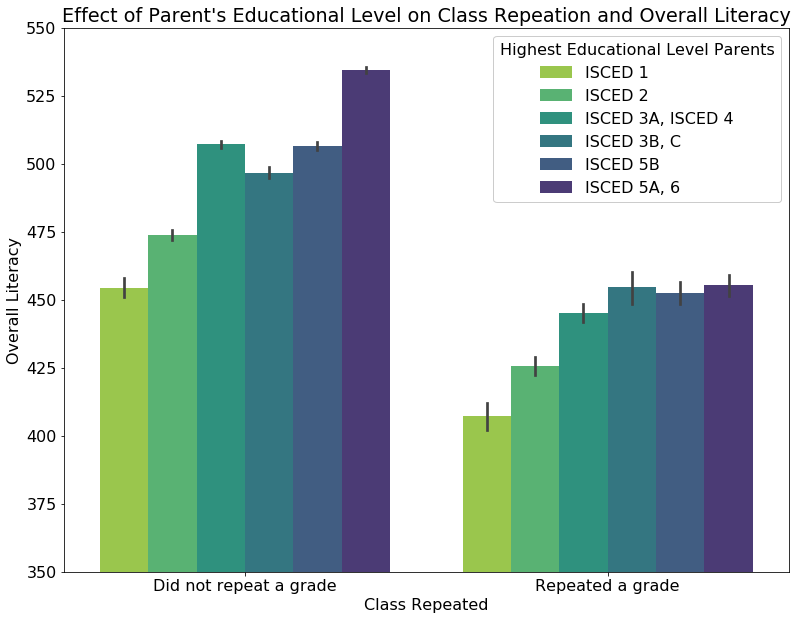

In [95]:
plt.figure(figsize = [13, 10])
ax = sb.barplot(data = df_pisa_final, x = 'Class_repeated', y = 'Overall_Literacy', hue = 'Highest_educational_level_parents', palette='viridis_r')
ax.legend(loc = 1, ncol = 1, framealpha = 1, title = 'Highest Educational Level Parents')
plt.title("Effect of Parent's Educational Level on Class Repeation and Overall Literacy")
plt.xlabel('Class Repeated')
plt.ylabel('Overall Literacy')
ax.set_ylim([350,550]);

#### 2 Categorical and 1 Quantitative Variable
##### Internet Connection vs Class Repeated vs Overall Literacy

> In this plot, the variables investigated are shown below:
> * Class Repeated (Categorical)
> * Overall Literacy (Quantitative)
> * Internet Connection (Categorical)

Having 2 categorical and 1 Quantitative variables, a boxplot is used. On the x-axis is the variable "Class Repeated" and on y-axis is the variable "Overall Literacy" and with the 3 faceted boxplot having three options for the categorical variable called "Internet Connection". 

As visible in the plot regardless of the students having repeated a class or not, they have higher overall literacy given they had internet connection and used it as compared to those who had internet connection but didn't use it or those who didn't have internet connection at all.

A surprising observation found here was that those students eventho had repeated a grade had a higher overall literacy given they had and used internet connection compared to students who repeated or not repeated a class given they either had no internet connection or they had internet connection but didnt use it. 

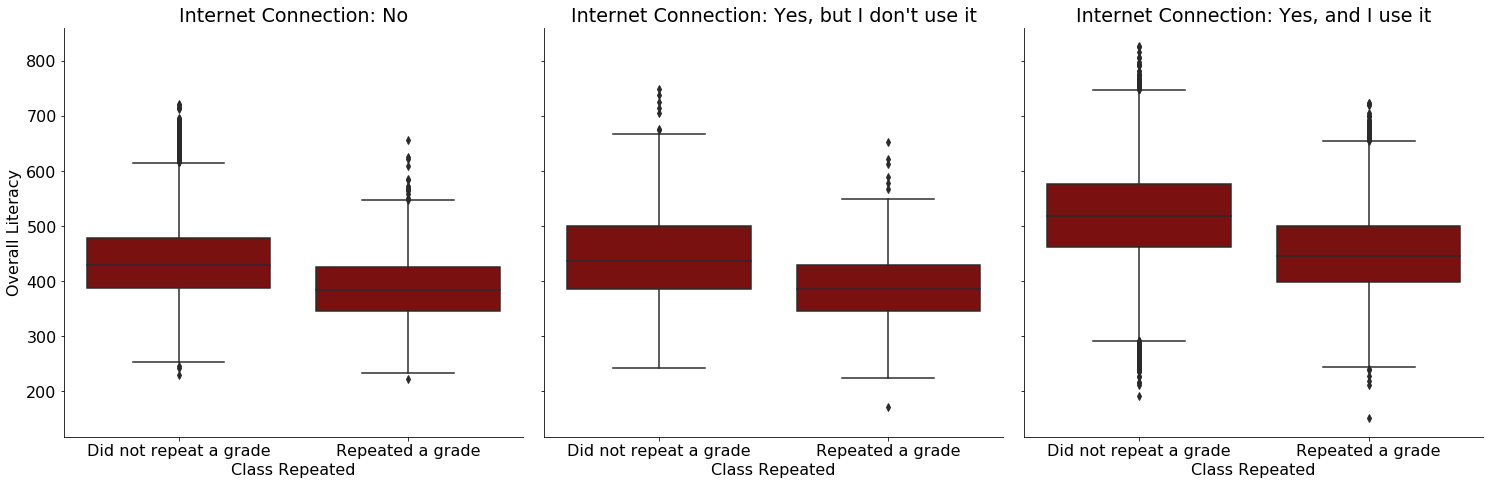

In [96]:
g = sb.FacetGrid(data = df_pisa_final, col = 'Internet_Connection', size = 7, col_wrap=3)
g.map(sb.boxplot, 'Class_repeated', 'Overall_Literacy', color='darkred');
#plt.title("Effect of having an Internet Connection on Class Repeation and Overall Literacy")
g.axes[0].set_xlabel('Class Repeated')
g.axes[1].set_xlabel('Class Repeated')
g.axes[2].set_xlabel('Class Repeated')
g.axes[0].set_ylabel('Overall Literacy');
g.axes[0].set_title("Internet Connection: No");
g.axes[1].set_title("Internet Connection: Yes, but I don't use it");
g.axes[2].set_title("Internet Connection: Yes, and I use it");

#### Plot 1 of 2: 2A
#### 2 Categorical and 1 Quantitative Variable
##### Internet Connection vs Class Repeated vs Count of Students

> In this plot, the variables investigated are shown below:
> * Class Repeated (Categorical)
> * Count of Students (Quantitative)
> * Internet Connection (Categorical)

Having 2 categorical and 1 Quantitative variables, a barplot is used. On the x-axis is the variable "Internet Connection" and on y-axis is the variable "Count of Students" and the color encoding representing "Repeat a Grade" variable. 

There are more number of students who repeated a grade given they have and use an internet connection compared to the students who either have internet connection but didn't use it or those who do not have internet connection altogether. This calls on to further investigate these variables but instead of the y-axis being the count variable I chose to use "Average Learning Time" variable to further explore a trend or a relationship worth discussing in the next plot (Plot 2B). 

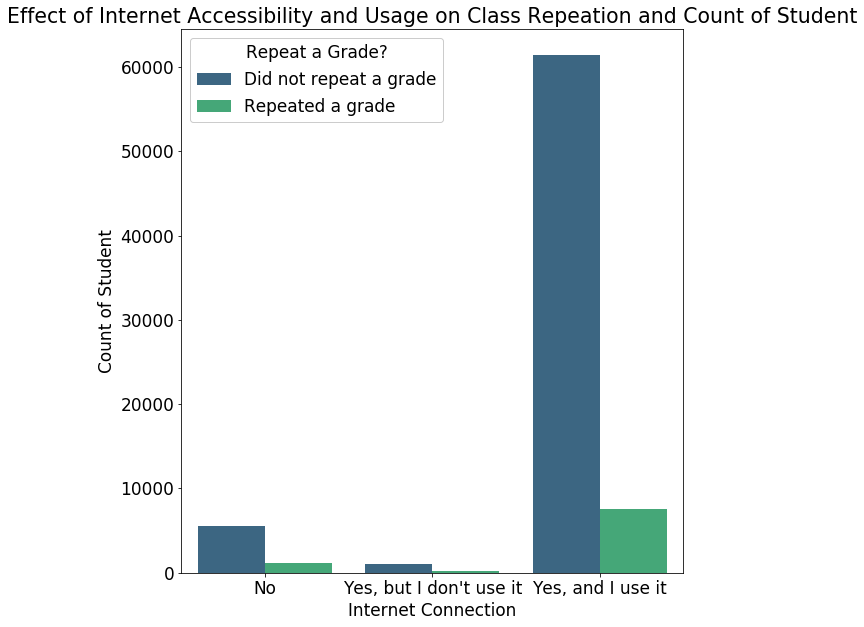

In [103]:
plt.figure(figsize = [9, 10])
ax = sb.countplot(data = df_pisa_final, x = 'Internet_Connection', hue = 'Class_repeated', palette='viridis')
ax.legend(loc = 2, ncol = 1, framealpha = 1, title = 'Repeat a Grade?')
plt.title("Effect of Internet Accessibility and Usage on Class Repeation and Count of Student")
plt.xlabel('Internet Connection')
plt.ylabel('Count of Student');
#plt.rcParams.update({'font.size': 17});

#### Plot 2 of 2: 2B
#### 2 Categorical and 1 Quantitative Variable
##### Internet Connection vs Class Repeated vs Average Learning Time in mins (per Week)

> In this plot, the variables investigated are shown below:
> * Class Repeated (Categorical)
> * Average Learning Time in mins per Week (Quantitative)
> * Internet Connection (Categorical)

Having 2 categorical and 1 Quantitative variable, a barplot is used. On the x-axis is the variable "Internet Connection" and on y-axis is the variable "Average Learning Time" and the color encoding representing "Repeat a Grade" variable. 

Those students who had and used internet connection tend to have the least amount of average learning time regardless of having repeated or not repeated a grade in comparison to the students who either have internet connection but didn't use it or those who do not have internet connection altogether. Students who had no internet connection had spent on average more learning time compared to those students who had internet connection and do not use it or those who have internet connection and use it.

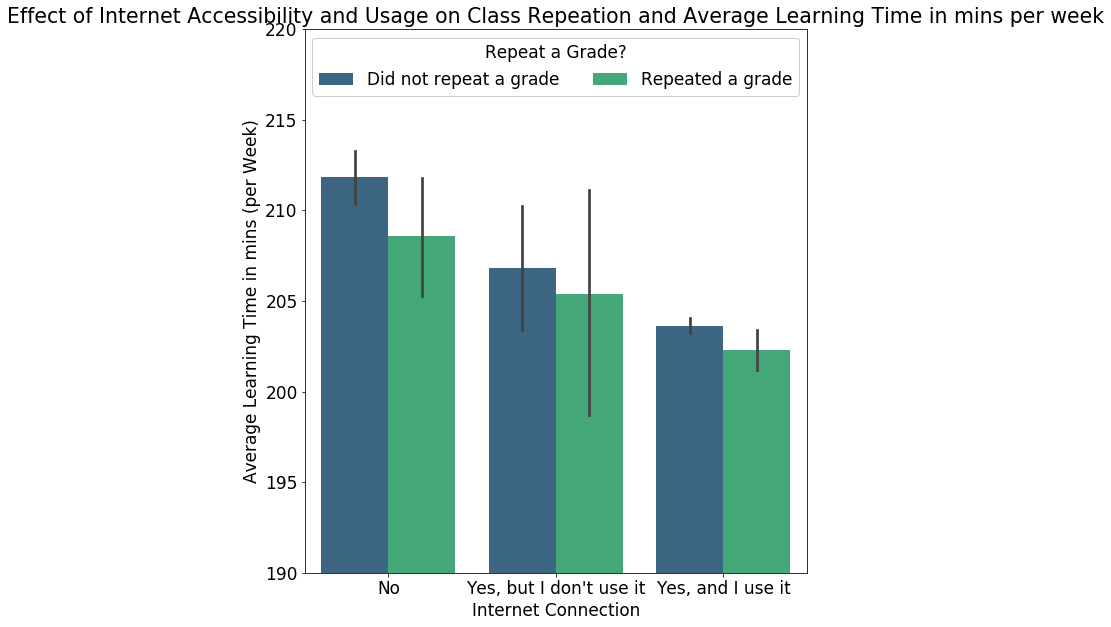

In [98]:
plt.figure(figsize = [9, 10])
ax = sb.barplot(data = df_pisa_final, x = 'Internet_Connection', y = 'Average_Learning_Time', hue = 'Class_repeated', palette='viridis')
ax.legend(loc = 9, ncol = 3, framealpha = 1, title = 'Repeat a Grade?')
ax.set_ylim([190,220]);
plt.title("Effect of Internet Accessibility and Usage on Class Repeation and Average Learning Time in mins per week")
plt.xlabel('Internet Connection')
plt.ylabel('Average Learning Time in mins (per Week)');
plt.rcParams.update({'font.size': 10});

## References

[1] http://www.oecd.org/pisa/pisaproducts/MS12_StQ_FORM_UH_ENG.pdf

[2] http://www.oecd.org/pisa/pisaproducts/CBA12_cogn_codebook.pdf

[3] http://www.oecd.org/pisa/pisaproducts/CBA12_cogs_codebook.pdf

[4] https://stackoverflow.com/questions/38085547/random-sample-of-a-subset-of-a-dataframe-in-pandas

[5] https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51

[6] https://stackoverflow.com/questions/34782063/how-to-use-pandas-filter-with-iqr

[7] https://gist.github.com/fomightez/bb5a9c727d93d1508187677b4d74d7c1

[8] https://stackoverflow.com/questions/3777861/setting-y-axis-limit-in-matplotlib

[9] https://seaborn.pydata.org/tutorial/color_palettes.html

[10] https://stackoverflow.com/questions/3899980/how-to-change-the-font-size-on-a-matplotlib-plot

[11] https://cduvallet.github.io/posts/2018/11/facetgrid-ylabel-access

[12] https://www.oecd.org/pisa/sitedocument/PISA-2015-Technical-Report-Chapter-9-Scaling-PISA-Data.pdf

[13] https://www.oecd.org/pisa/pisaproducts/PISA12_stu_codebook.pdf

[14] http://www.oecd.org/pisa/pisaproducts/PISA%202012%20framework%20e-book_final.pdf

[15] http://www.oecd.org/pisa/aboutpisa/

[16] http://www.oecd.org/pisa/pisaproducts/PISA-2012-technical-report-final.pdf

[17] https://en.wikipedia.org/wiki/International_Standard_Classification_of_Education

[18] https://stackoverflow.com/questions/5552555/unicodedecodeerror-invalid-continuation-byte

[19] https://largescaleassessmentsineducation.springeropen.com/articles/10.1186/s40536-020-00086-x#Sec38

[20] https://www.oecd.org/pisa/sitedocument/PISA-2015-Technical-Report-Chapter-16-Procedures-and-Construct-Validation-of-Context-Questionnaire-Data.pdf

[21] http://uis.unesco.org/sites/default/files/documents/international-standard-classification-of-education-isced-2011-en.pdf

[22] https://towardsdatascience.com/getting-more-value-from-the-pandas-value-counts-aa17230907a6#:~:text=value_counts()%20displaying%20the%20NaN,the%20dropna%20parameter%20to%20False%20.&text=We%20can%20easily%20see%20that,null%20values%20in%20the%20column.

[23] https://medium.com/@danberdov/dealing-with-missing-data-8b71cd819501#:~:text=As%20a%20rule%20of%20thumb,the%20variable%20should%20be%20considered.

[24] https://thispointer.com/pandas-drop-rows-from-a-dataframe-with-missing-values-or-nan-in-columns/

[26] https://dev.to/thalesbruno/subplotting-with-matplotlib-and-seaborn-5ei8

[27] https://stackoverflow.com/questions/25239933/how-to-add-title-to-subplots-in-matplotlib

[28] https://www.kaggle.com/residentmario/subplots

In [99]:
#df_pisa_final.to_csv('df_pisa_final.csv')
#df_trimmed.to_csv('df_trimmed.csv')